# DEL/UFRJ - EEL891 - Semestre 2018-2 - Trabalho 1

**Nome:** Gabriel Gazola Milan  **DRE:** 116034377

**Kaggle profile:** https://www.kaggle.com/gabrielmilan

**GitHub profile:** https://www.github.com/gabriel-milan

## Análise exploratória e manipulação dos dados

Abaixo as bibliotecas que utilizaremos para análise dos dados, sendo:
* *pandas* para geração de um modelo de dados estruturado e manipulação do mesmo;
* *numpy e scipy* para cálculos matemáticos;
* *seaborn* com ferramentas de estatística;
* *matplotlib* para visualização de dados.

In [1]:
# Importando bibliotecas para análise
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as st
import matplotlib.pyplot as plt
from scipy.special import boxcox1p

# Inline plotting
%matplotlib inline

# Max iterations
max_iter = 15000

# Carregando dados
raw_train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

# Separando 25% dos dados de treino para validação
validation = raw_train[:int(len(raw_train)*.25)].copy()
train = raw_train[int(len(raw_train)*.25):].copy()

print(train.shape)
print(validation.shape)
print(test.shape)

#print(raw_train[raw_train.Id == 2149], raw_train[raw_train.Id == 2325], raw_train[raw_train.Id == 2989])

(3513, 21)
(1170, 21)
(2000, 20)


### Observação dos dados

Ao início da análise exploratória, verificou-se a descrição do conjunto de treino fornecida pela biblioteca *pandas* e os primeiros dados do conjunto, como exemplo

In [2]:
train.describe()

,Id,quartos,suites,vagas,area_util,area_extra,churrasqueira,estacionamento,piscina,playground,quadra,s_festas,s_jogos,s_ginastica,sauna,vista_mar,preco
count,3513.000000,3513.000000,3513.000000,3513.000000,3513.000000,3513.000000,3513.000000,3513.000000,3513.000000,3513.000000,3513.000000,3513.000000,3513.000000,3513.000000,3513.000000,3513.000000,3.513000e+03
mean,4926.000000,3.043268,1.435241,1.707373,125.019926,14.997438,0.315400,0.031028,0.551096,0.154569,0.038429,0.139767,0.007401,0.015087,0.095929,0.028181,8.226956e+05
std,1014.260075,0.877039,1.113123,1.220924,108.460201,307.163525,0.464741,0.173417,0.497453,0.361545,0.192256,0.346794,0.085723,0.121916,0.294536,0.165513,5.857940e+06
min,3170.000000,1.000000,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.500000e+02
25%,4048.000000,3.000000,1.000000,1.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.550000e+05
50%,4926.000000,3.000000,1.000000,2.000000,96.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.150000e+05
75%,5804.000000,4.000000,2.000000,2.000000,150.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.200000e+05
max,6682.000000,9.000000,6.000000,30.000000,2045.000000,17450.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.400000e+08


In [3]:
train.head()

,Id,tipo,bairro,tipo_vendedor,quartos,suites,vagas,area_util,area_extra,diferenciais,...,estacionamento,piscina,playground,quadra,s_festas,s_jogos,s_ginastica,sauna,vista_mar,preco
1170,3170,Apartamento,Caxanga,Imobiliaria,2,1,1,55,0,piscina e churrasqueira,...,0,1,0,0,0,0,0,0,0,290000.0
1171,3171,Apartamento,Imbiribeira,Imobiliaria,3,1,1,72,0,nenhum,...,0,0,0,0,0,0,0,0,0,315000.0
1172,3172,Casa,Pina,Imobiliaria,3,1,2,180,210,piscina,...,0,1,0,0,0,0,0,0,0,1150000.0
1173,3173,Casa,Ilha do Leite,Pessoa Fisica,7,2,4,240,252,nenhum,...,0,0,0,0,0,0,0,0,0,1900000.0
1174,3174,Apartamento,Boa Viagem,Imobiliaria,2,1,1,62,28,nenhum,...,0,0,0,0,0,0,0,0,0,350000.0


### Manipulação da coluna "diferenciais"

Foi identificado que a coluna "diferenciais" consiste em uma tupla de dados categóricos não estruturada. A seguir, será feito um *parsing* desses dados, de forma a gerar novas colunas, colocando esses dados de maneira estruturada.

In [4]:
# Construindo um conjunto com todas as palavras exibidas na coluna "diferenciais"
words_set = set()
for data in train['diferenciais']:
    for word in data.split(' '):
        words_set.add(word)
#print ("Raw words set: {}".format(words_set))

#print ("")

# Algumas stop-words serão removidas manualmente
to_be_removed = ['o', 'e', 'de', 'nenhum', 'para']
for remove_word in to_be_removed:
    words_set.remove(remove_word)
#print ("Removed stop-words set: {}".format(words_set))

#print ("")

# Agora verificamos quais palavras restaram, tentando formar categorias de dados
for word in words_set:
    #print ("--- Word: {}".format(word))
    cat_list = []
    for data in train['diferenciais']:
        if word in data:
            cat_list.append(data)
    #print (cat_list)
    
# Ainda que com muito texto, foi possível encontrar categorias, descritas abaixo
add_columns = set([
    'esquina',
    'campo de futebol',
    'children care',
    'frente para o mar',
    'salao de jogos',
    'sauna',
    'quadra poliesportiva',
    'salao de festas',
    'copa',
    'quadra de squash',
    'sala de ginastica',
    'piscina',
    'churrasqueira',
    'vestiario',
    'estacionamento visitantes',
    'playground',
    'hidromassagem'
])

# Imprimindo a quantidade de amostras que possuem dados relativos às categorias supracitadas
for feature in add_columns:
    count = 0
    for data in train['diferenciais']:
        if feature in data:
            count += 1
    print ("Category {}: {} samples".format(feature, count))

Category frente para o mar: 99 samples
Category hidromassagem: 3 samples
Category esquina: 74 samples
Category churrasqueira: 1108 samples
Category sala de ginastica: 53 samples
Category campo de futebol: 82 samples
Category playground: 543 samples
Category children care: 5 samples
Category copa: 248 samples
Category piscina: 1936 samples
Category sauna: 337 samples
Category quadra poliesportiva: 54 samples
Category estacionamento visitantes: 109 samples
Category quadra de squash: 0 samples
Category salao de festas: 491 samples
Category salao de jogos: 26 samples
Category vestiario: 4 samples


Após essa análise, constatou-se que, antes de proceder com a exploratória, seria necessária a manipulação desses dados em ambos os conjuntos de treino e teste. Após a manipulação, os dados são exibidos abaixo.

In [5]:
def process_diferenciais (dataframe):
    add_categorical = ['esquina', 'vestiario', 'children care', 'hidromassagem']
    for column in add_categorical:
        data = dataframe['diferenciais'].apply(lambda x : column in x).map({True : 1, False : 0})
        dataframe[column] = pd.Series(data, index = dataframe.index)
    dataframe.drop(columns = ['diferenciais'], inplace = True)

process_diferenciais(train)
process_diferenciais(test)
process_diferenciais(validation)

In [6]:
# Verificando os shapes dos dados
print ("Train data shape is {}".format(train.shape))
print ("Test data shape is {}".format(test.shape))
print ("Validation data shape is {}".format(validation.shape))

Train data shape is (3513, 24)
Test data shape is (2000, 23)
Validation data shape is (1170, 24)


In [7]:
# Exibindo a descrição do novo conjunto de treino
train.describe()

,Id,quartos,suites,vagas,area_util,area_extra,churrasqueira,estacionamento,piscina,playground,...,s_festas,s_jogos,s_ginastica,sauna,vista_mar,preco,esquina,vestiario,children care,hidromassagem
count,3513.000000,3513.000000,3513.000000,3513.000000,3513.000000,3513.000000,3513.000000,3513.000000,3513.000000,3513.000000,...,3513.000000,3513.000000,3513.000000,3513.000000,3513.000000,3.513000e+03,3513.000000,3513.000000,3513.000000,3513.000000
mean,4926.000000,3.043268,1.435241,1.707373,125.019926,14.997438,0.315400,0.031028,0.551096,0.154569,...,0.139767,0.007401,0.015087,0.095929,0.028181,8.226956e+05,0.021065,0.001139,0.001423,0.000854
std,1014.260075,0.877039,1.113123,1.220924,108.460201,307.163525,0.464741,0.173417,0.497453,0.361545,...,0.346794,0.085723,0.121916,0.294536,0.165513,5.857940e+06,0.143620,0.033729,0.037705,0.029214
min,3170.000000,1.000000,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,7.500000e+02,0.000000,0.000000,0.000000,0.000000
25%,4048.000000,3.000000,1.000000,1.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.550000e+05,0.000000,0.000000,0.000000,0.000000
50%,4926.000000,3.000000,1.000000,2.000000,96.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,5.150000e+05,0.000000,0.000000,0.000000,0.000000
75%,5804.000000,4.000000,2.000000,2.000000,150.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.200000e+05,0.000000,0.000000,0.000000,0.000000
max,6682.000000,9.000000,6.000000,30.000000,2045.000000,17450.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,3.400000e+08,1.000000,1.000000,1.000000,1.000000


### Distribuição de dados e *outliers*

Com novos conjuntos de dados, pode-se proceder com a exploratória, verificando a distribuição dos preços.

/home/gabriel-milan/.local/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


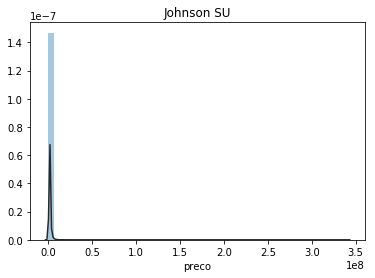

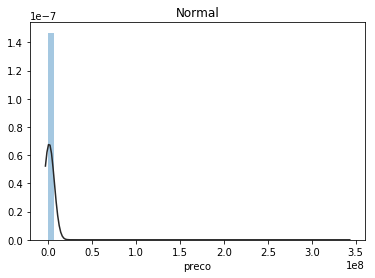

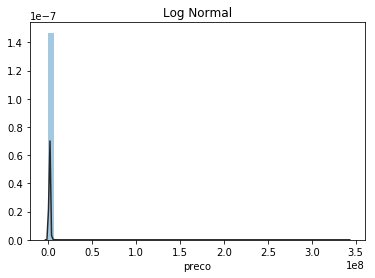

In [8]:
# Checking distribution
y = train['preco']
plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=st.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm)
plt.show()

É bem claro de se ver que há algo errado com a distribuição, ou seja, é provável que existam *outliers* no conjunto de dados. A fim de procurá-los, exibe-se o "*scatter plot*" dos preços.

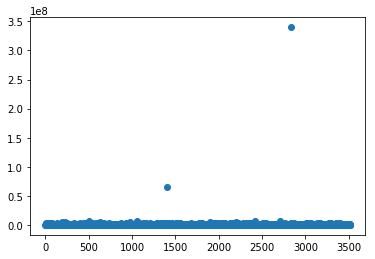

In [9]:
plt.scatter(range(0, len(train['preco'])), train['preco'])
plt.show()

Percebe-se que há três amostras bem acima das outras (preço >= 1e7). Para proceder, essas amostras serão removidas.

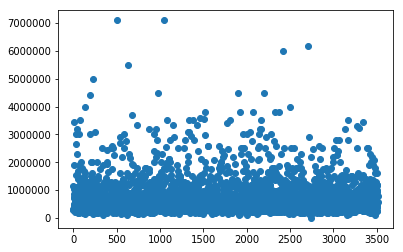

In [10]:
# Removing data for price above 1e7 (3 samples)
train = train.drop(train[train.preco > 1e7].index)

# Plotting scatter again
plt.scatter(range(0, len(train['preco'])), train['preco'])
plt.show()

Agora o conjunto parece coeso. Como foi verificado que há *outliers* no *dataset*, deseja-se encontrar outros. Para isso, exibem-se gráficos de "Preço" x "*feature*"

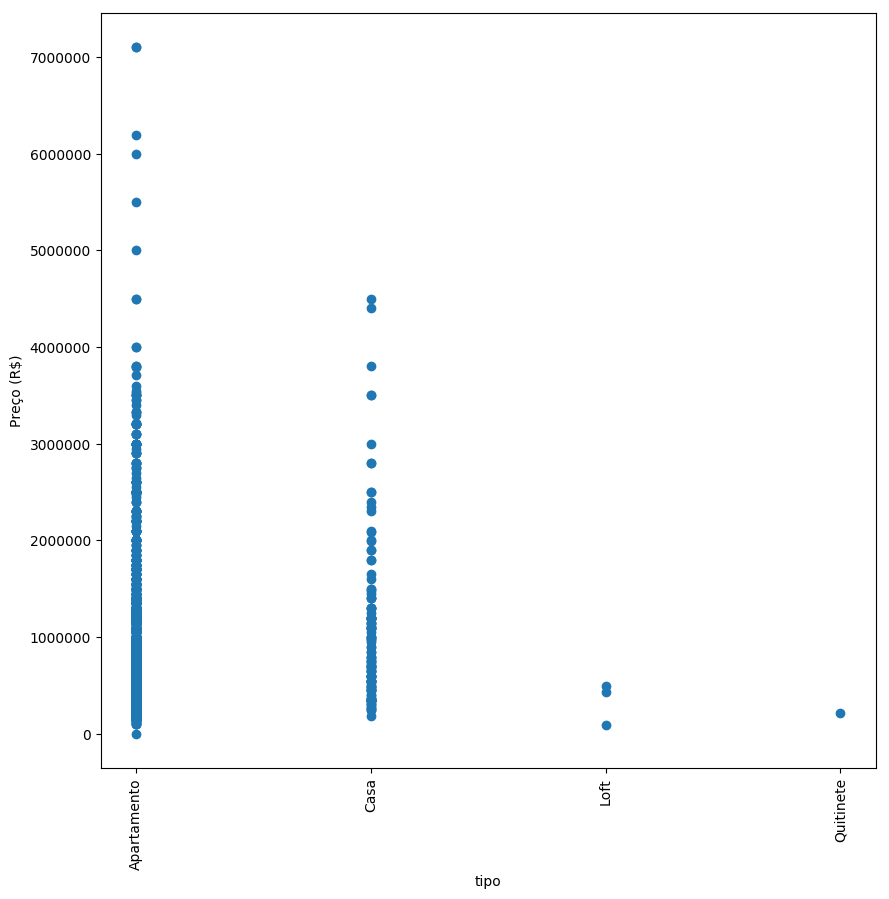

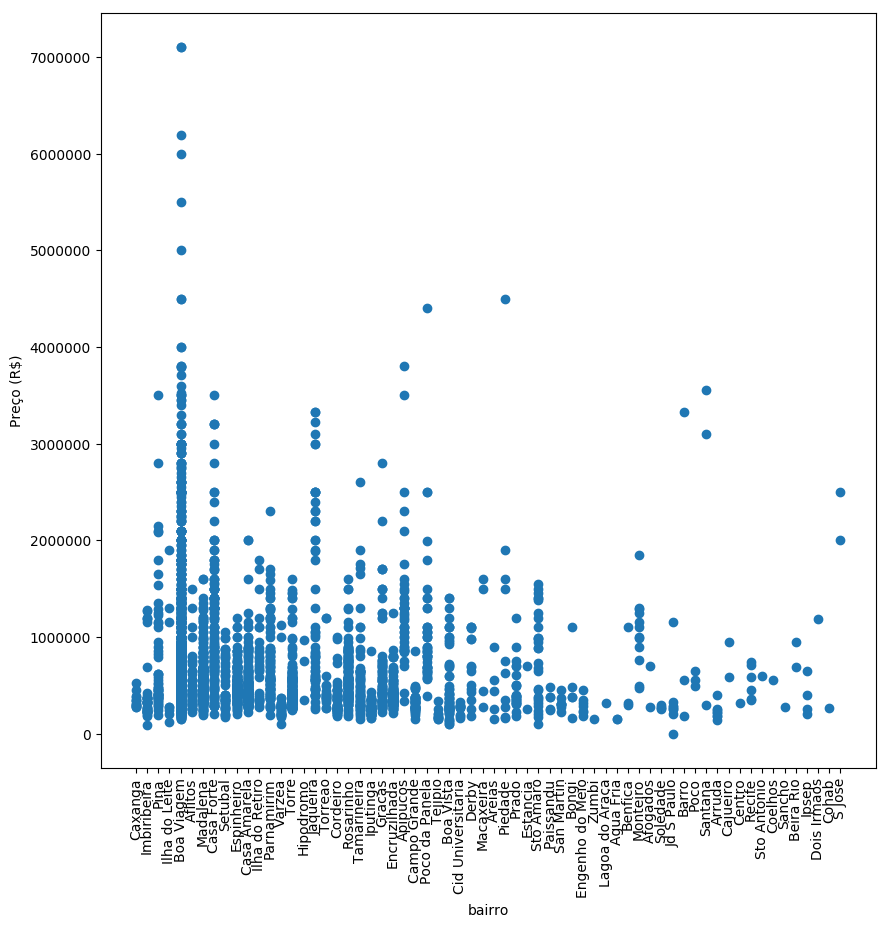

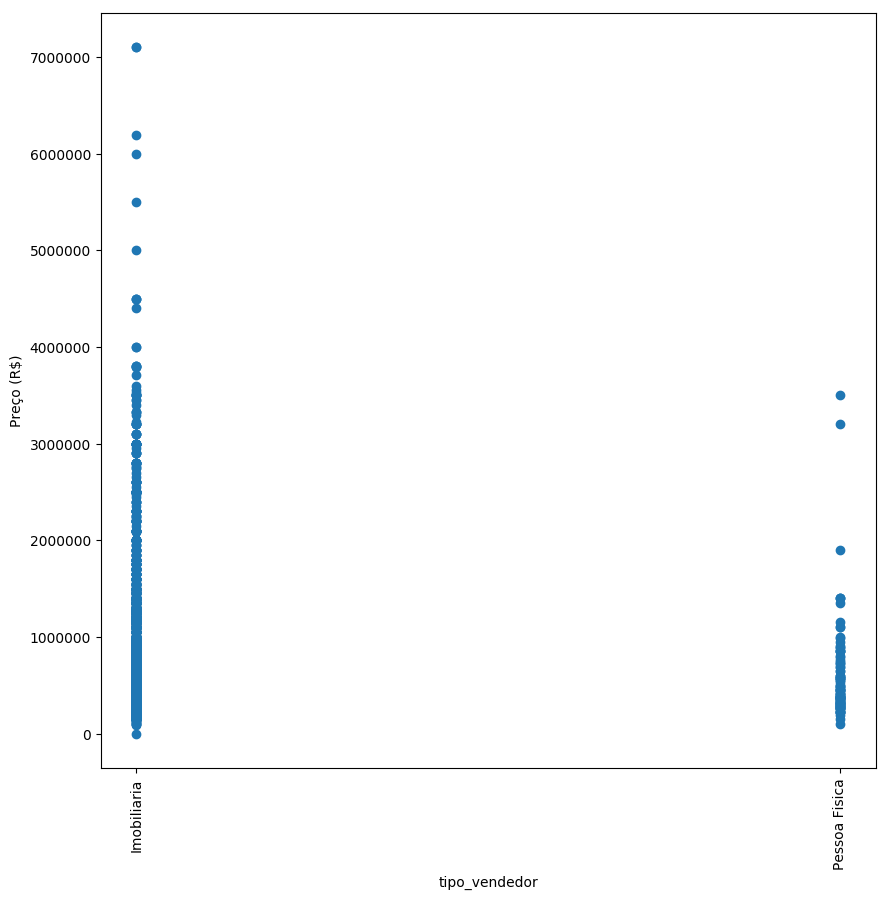

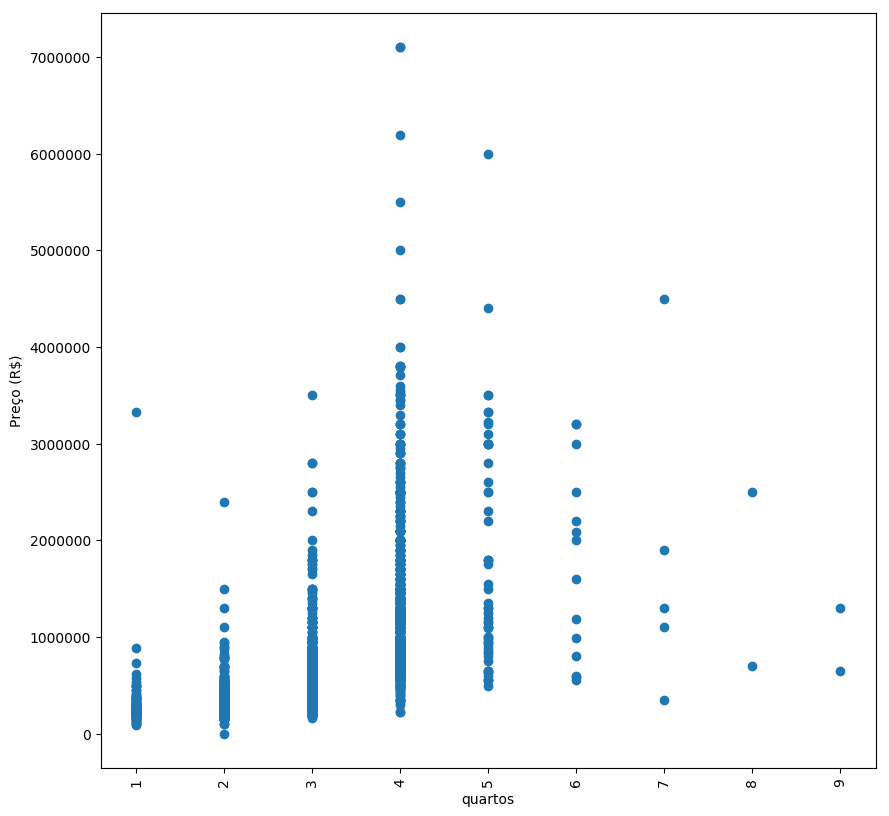

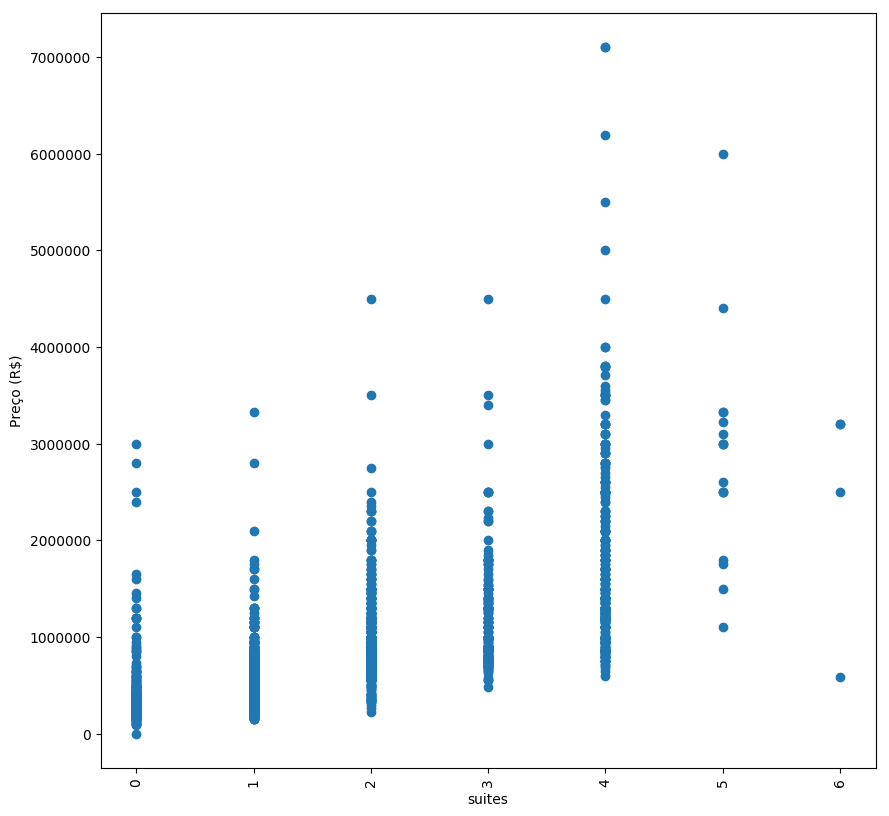

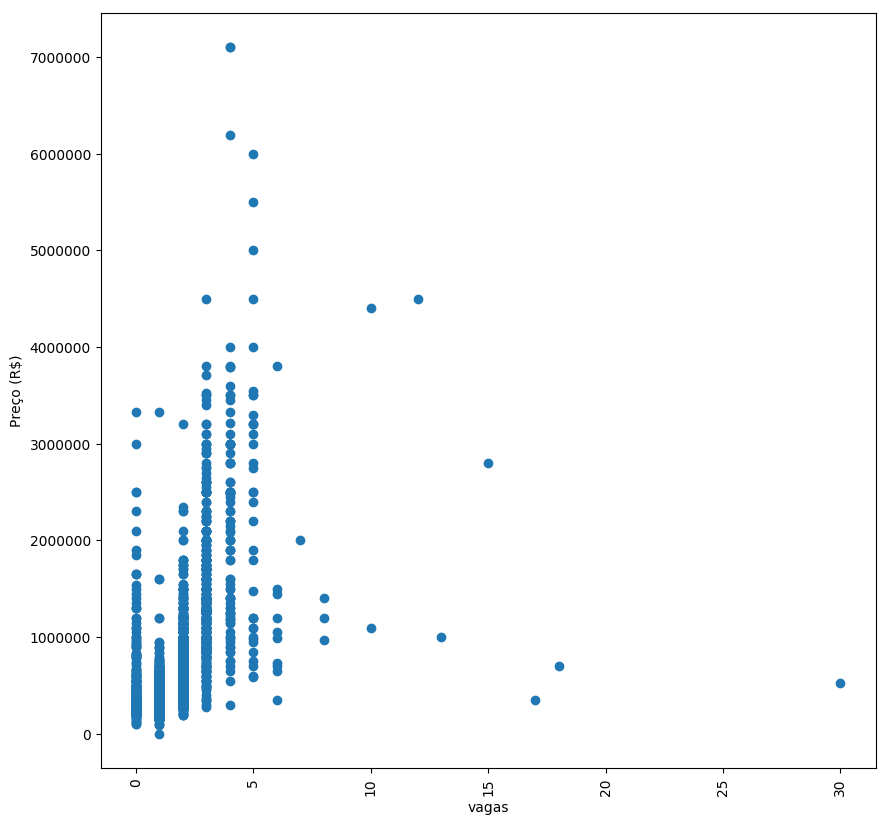

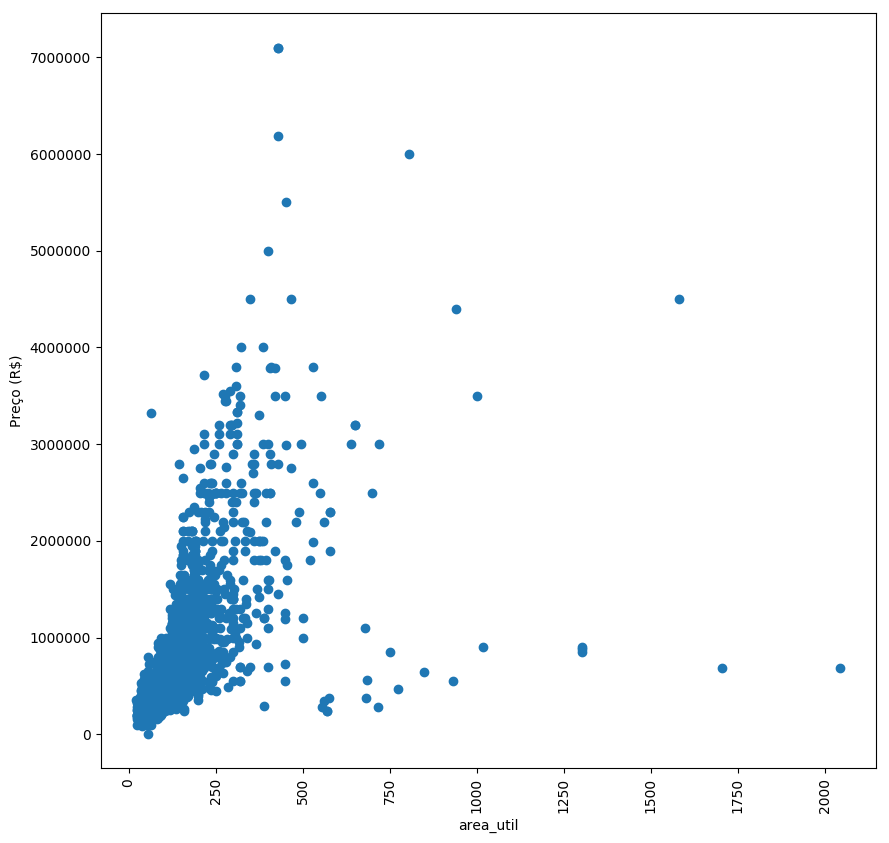

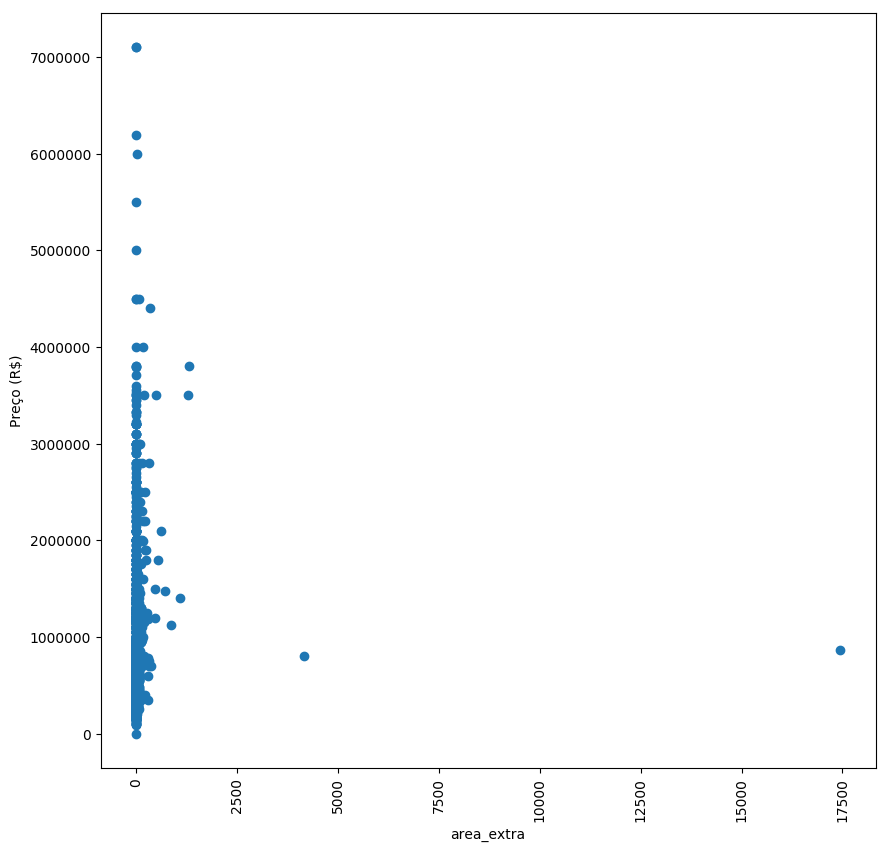

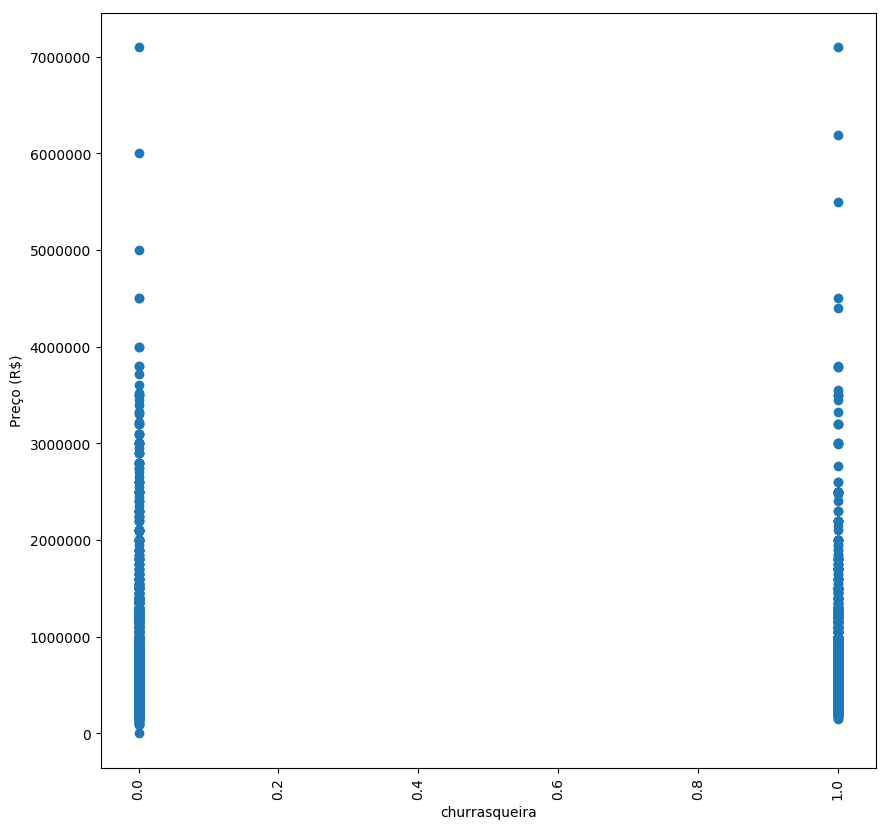

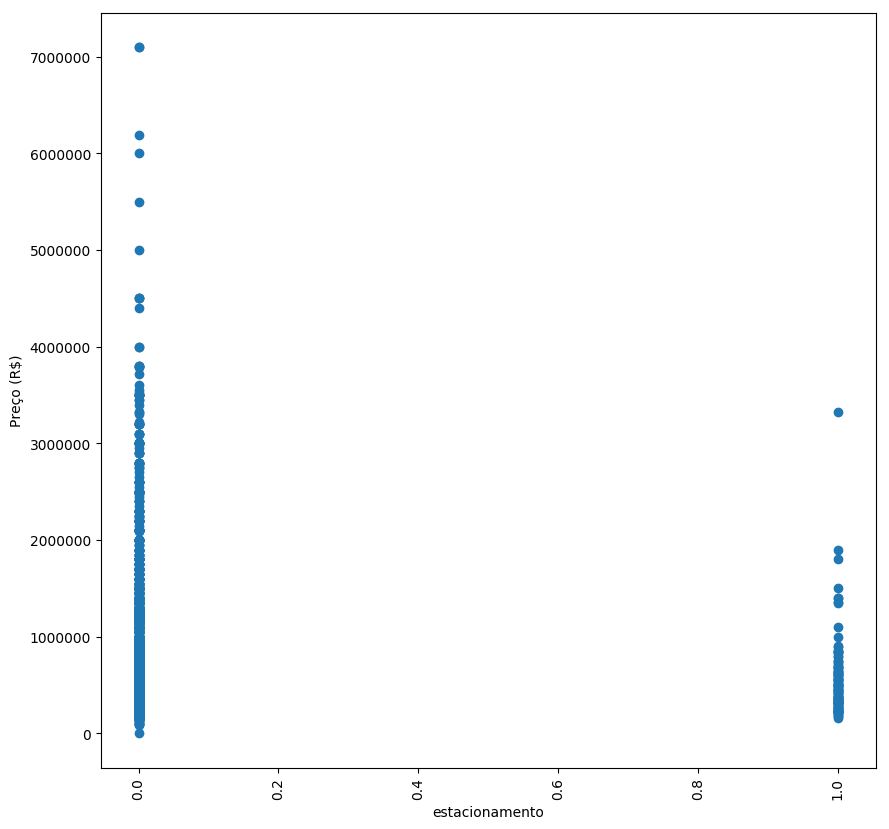

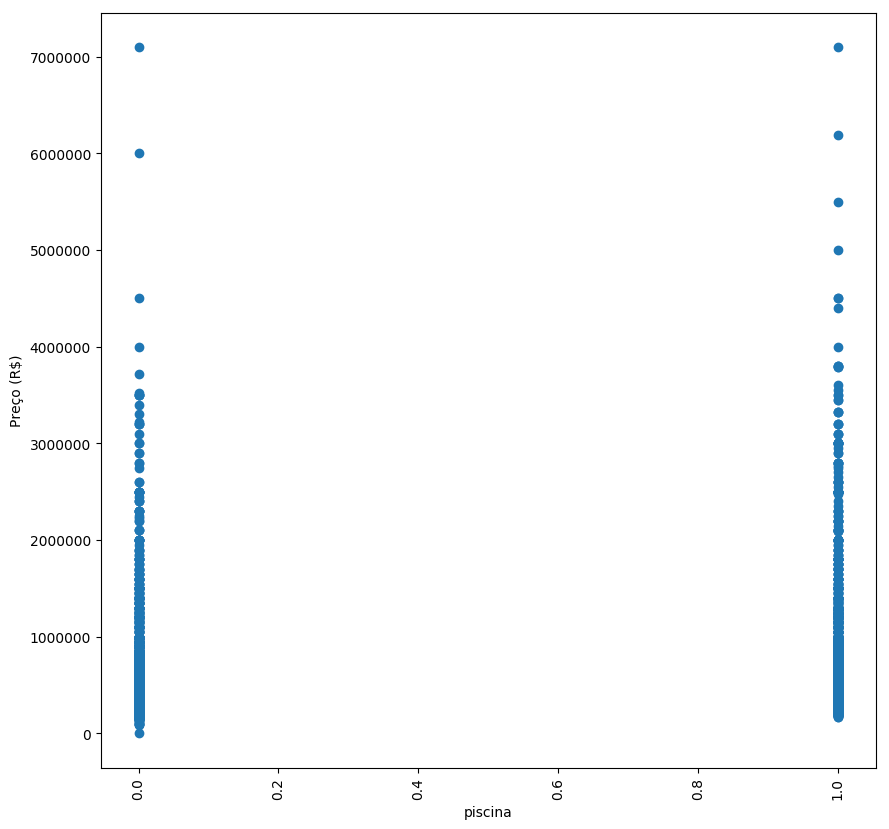

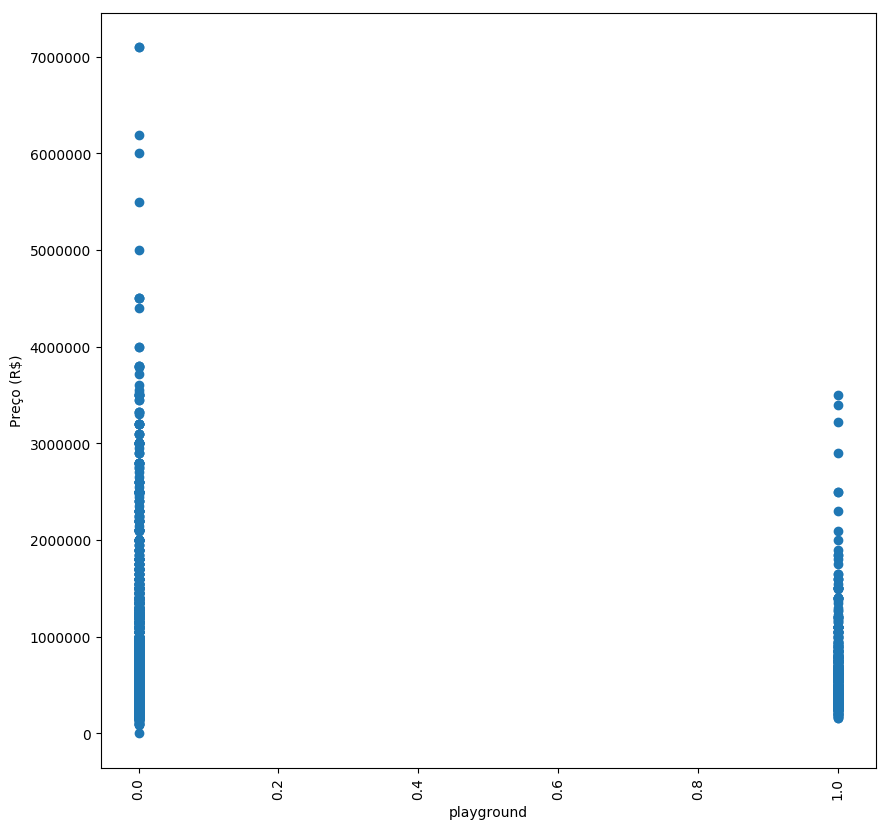

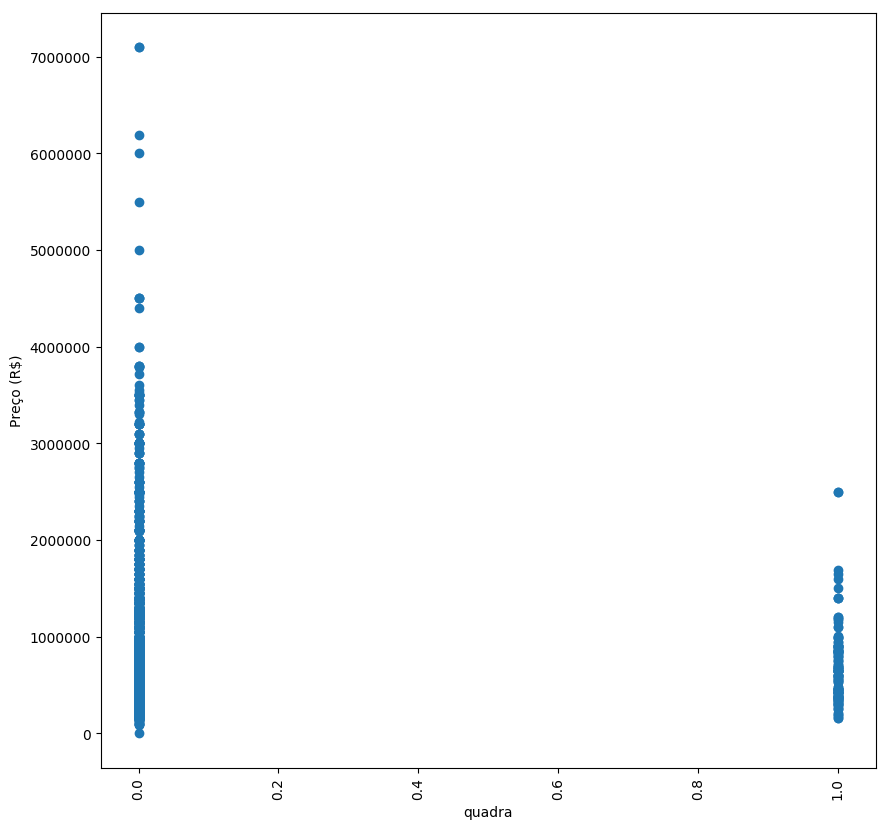

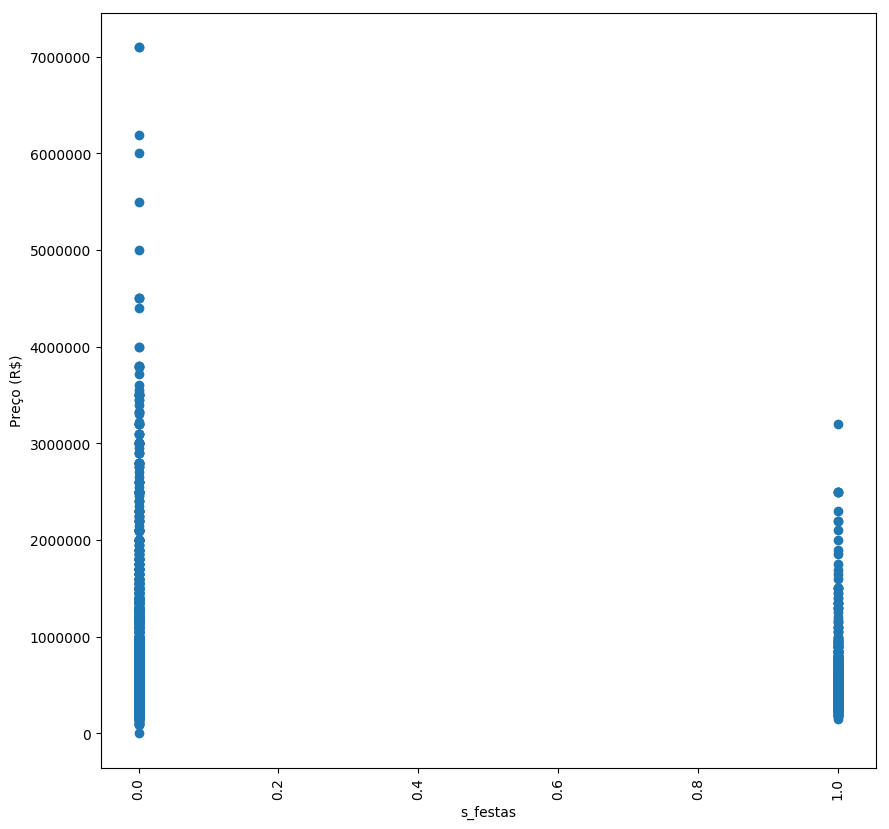

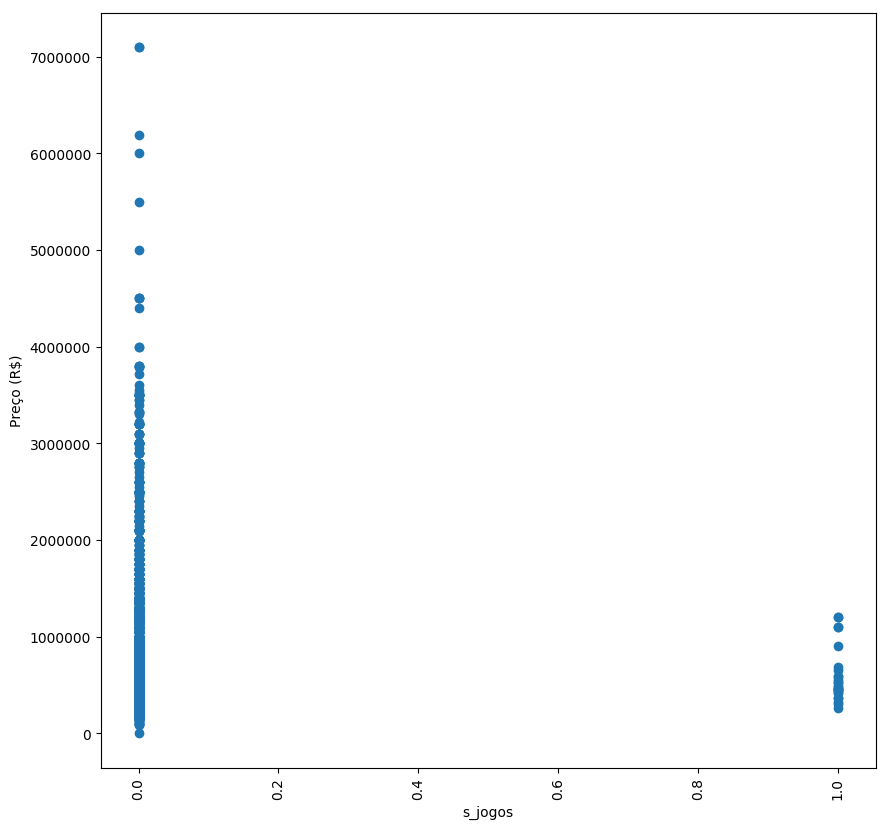

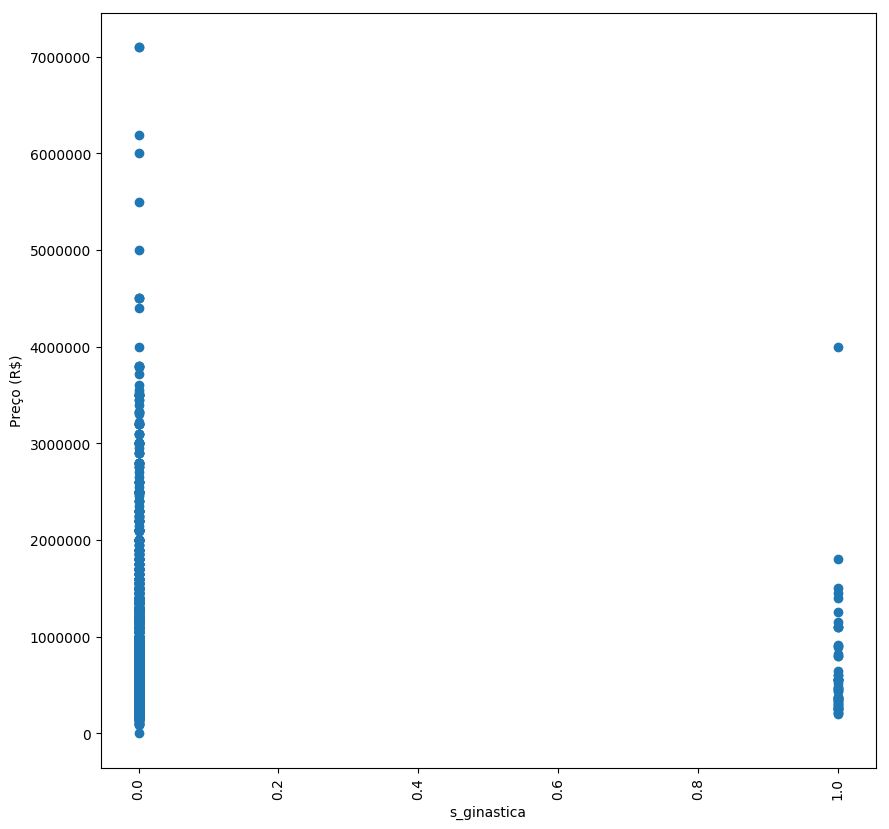

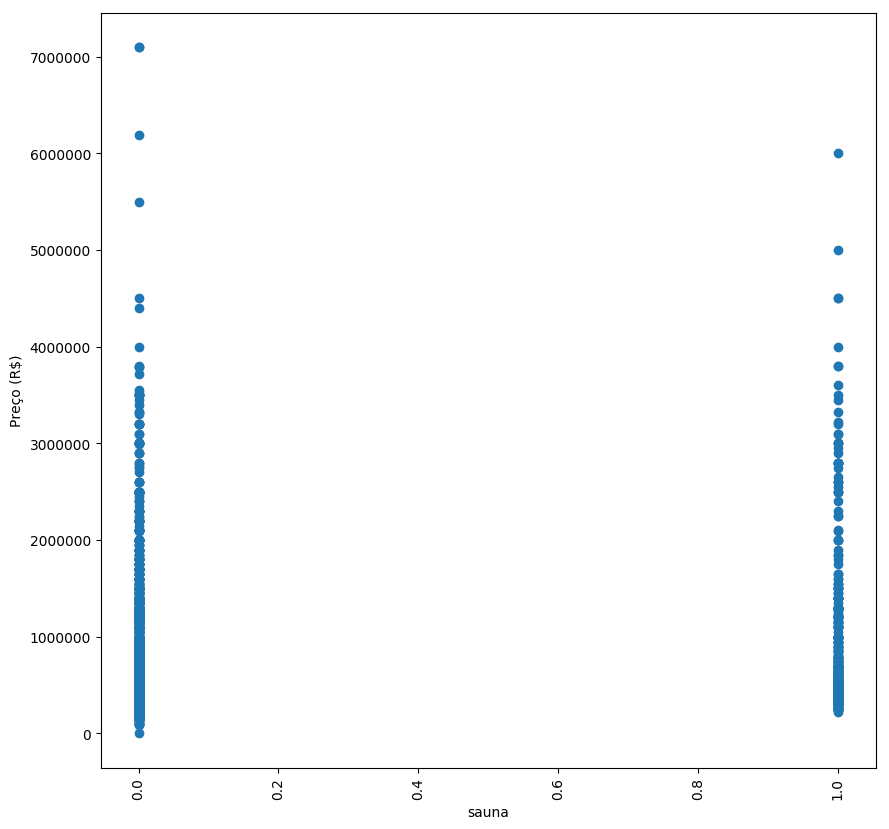

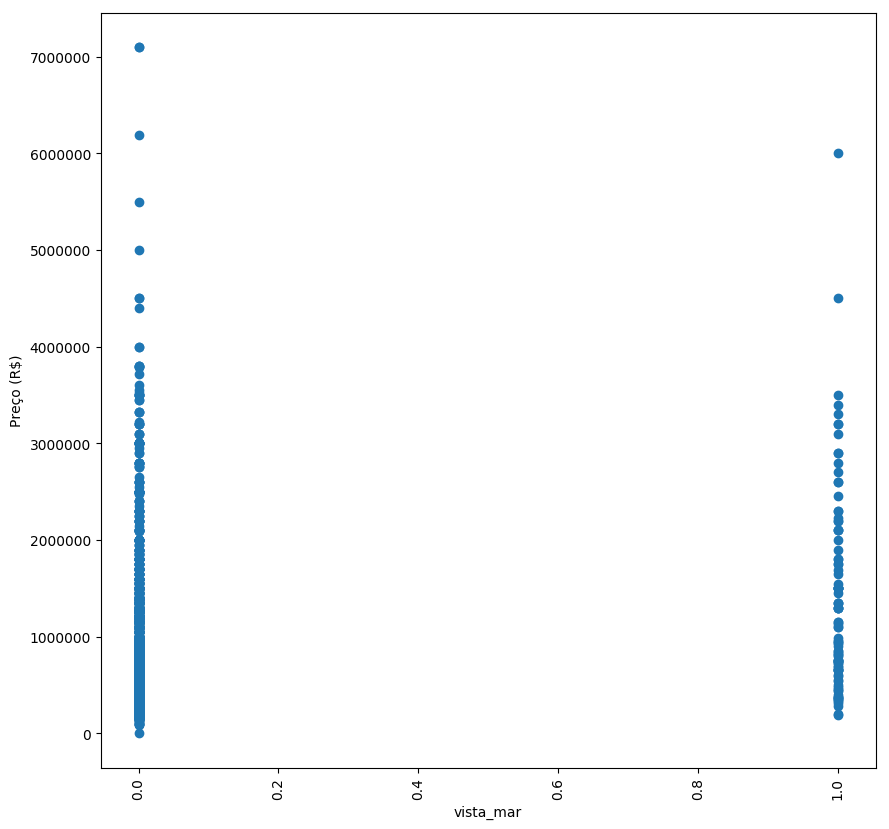

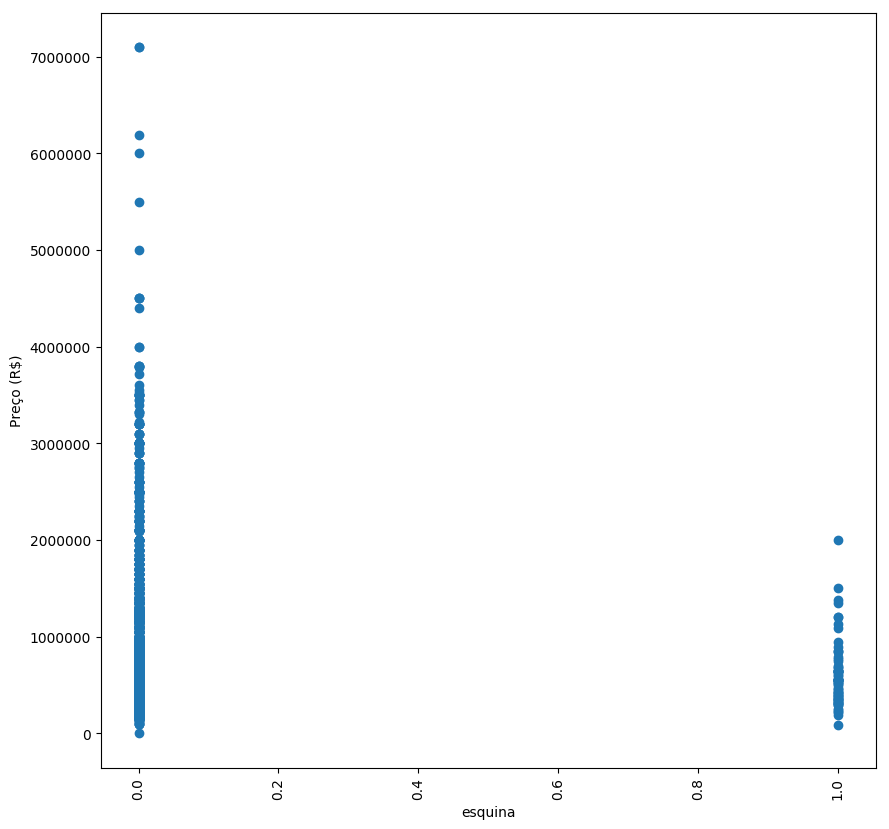

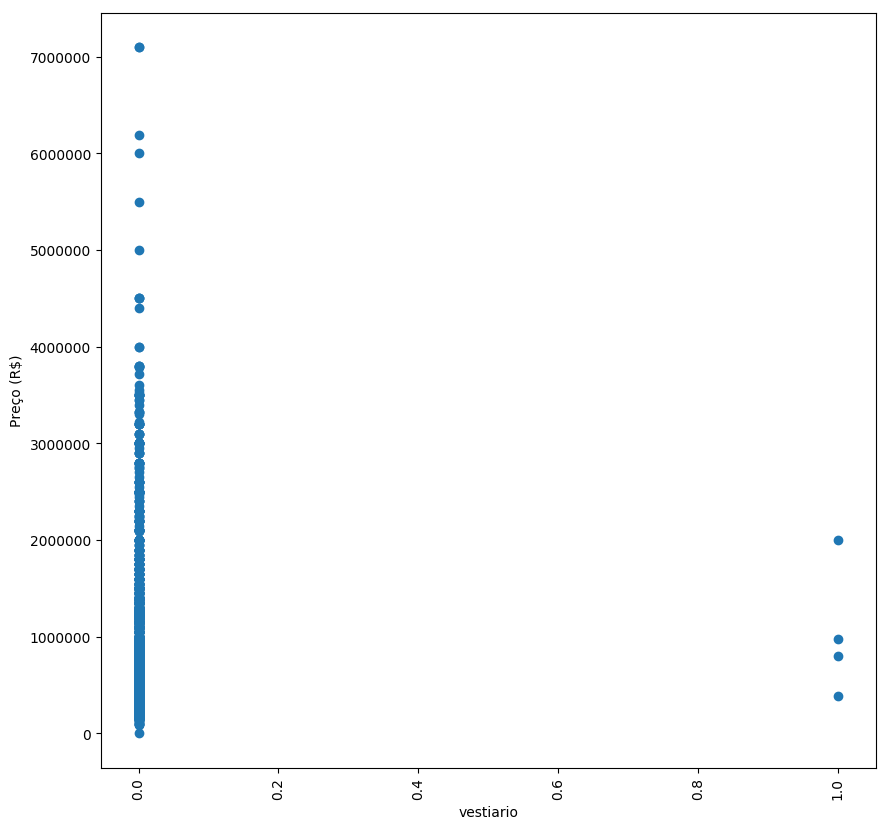

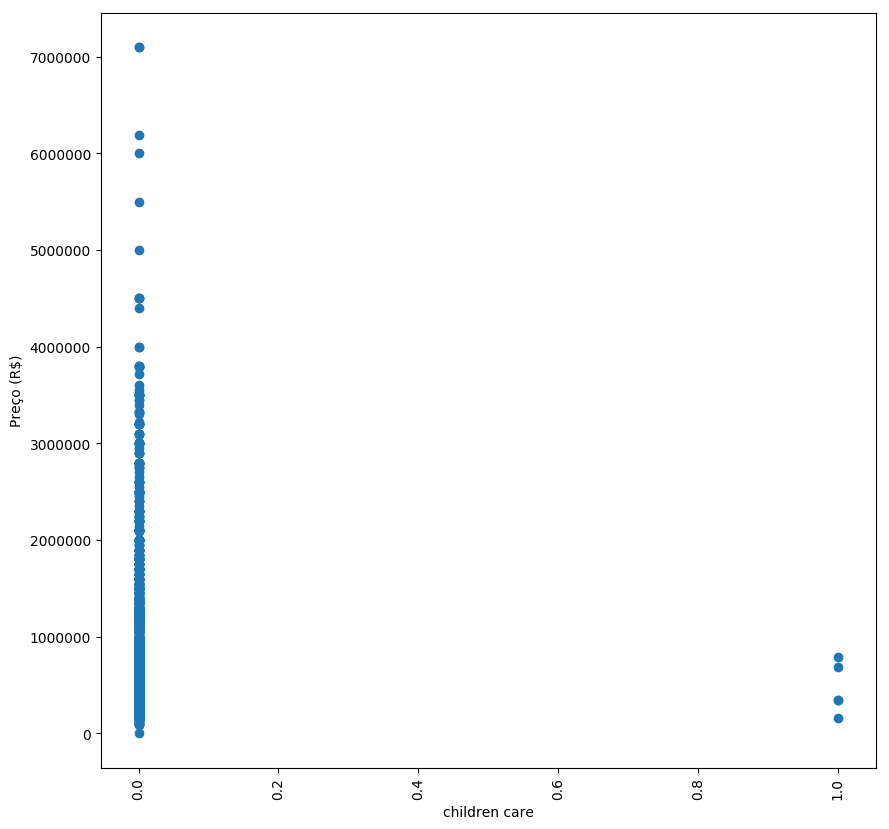

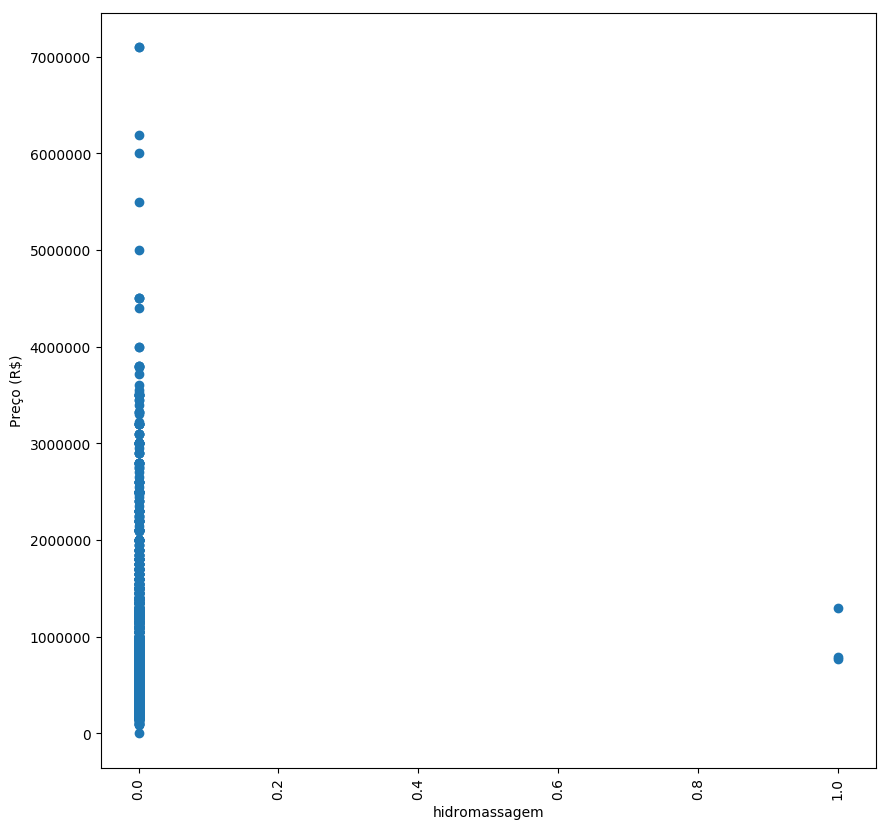

In [11]:
# Trying to find outliers plotting "preco" vs. <feature_name>
for feature in train:
    if feature != 'preco' and feature != 'Id':
        plt.figure(num=None, figsize=(10, 10), dpi=100, facecolor='w', edgecolor='k')
        plt.scatter(train[feature], train['preco'])
        plt.xlabel(feature)
        plt.xticks(rotation=90)
        plt.ylabel('Preço (R$)')
        plt.show()

Após a exibição desses gráficos, vê-se que há outros *outliers* a serem removidos. A remoção, então, será feita e, assim, pode-se proceder a análise dos dados.

In [12]:
# Removing outliers

# "Bairro" outliers
train = train.drop(train[(train.bairro == 'Piedade') & (train.preco >= 4e6)].index)

# "Quartos" outliers
train = train.drop(train[(train.quartos == 1) & (train.preco >= 3e6)].index)
train = train.drop(train[(train.quartos == 7) & (train.preco <= 1e6)].index)
train = train.drop(train[(train.quartos == 8) & (train.preco <= 2e6)].index)
train = train.drop(train[train.quartos == 9].index)

# "Suites" outliers
train = train.drop(train[(train.suites == 1) & (train.preco >= 5e6)].index)
train = train.drop(train[(train.suites == 6) & (train.preco <= 1e6)].index)

# "Vagas" outliers
train = train.drop(train[train.vagas > 10].index)

# "Área util" outliers
train = train.drop(train[(train.area_util >= 1250) & (train.preco <= 2e6)].index)

# "Área extra" outliers
train = train.drop(train[train.area_extra >= 2500].index)

# "Estacionamento" outliers
train = train.drop(train[(train.estacionamento == 1) & (train.preco >= 3e6)].index)

# "Quadra" outliers
train = train.drop(train[(train.quadra == 1) & (train.preco >= 4e6)].index)

# "S_Festas" outliers
train = train.drop(train[(train.s_festas == 1) & (train.preco >= 4e6)].index)

# "S_Ginastica" outliers
train = train.drop(train[(train.s_ginastica == 1) & (train.preco >= 3e6)].index)

# Plotting data again
#for feature in train:
#    if feature != 'preco' and feature != 'Id':
#        plt.figure(num=None, figsize=(10, 10), dpi=100, facecolor='w', edgecolor='k')
#        plt.scatter(train[feature], train['preco'])
#        plt.xlabel(feature)
#        plt.xticks(rotation=90)
#        plt.ylabel('Preço (R$)')
#        plt.show()

Verifica-se, novamente, a distribuição do conjunto de treino.

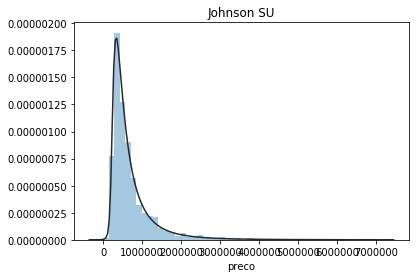

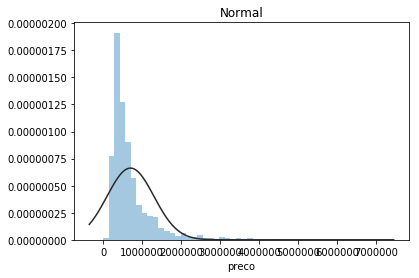

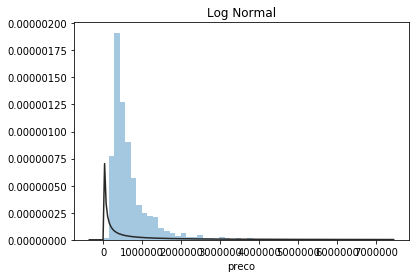

In [13]:
# Checking distribution again
y = train['preco']
plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=st.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm)

Como, para o *fitting* em log(preco), há estranheza, exibe-se o *scatter plot* do mesmo, com intuito de encontrar *outliers*

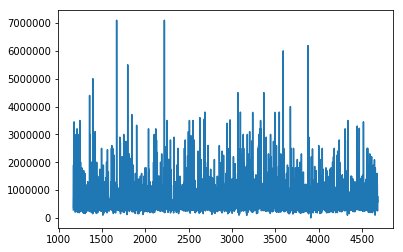

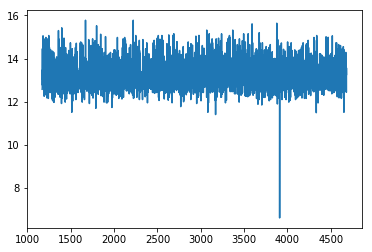

In [14]:
# Plotting prices
plt.plot(train['preco'])
plt.show()

# Plotting log(prices)
plt.figure()
plt.plot(np.log(train['preco']))
plt.show()

De fato há uma amostra que é um *outlier* em log(preço). Essa também será removida e verifica-se novamente a distribuição.

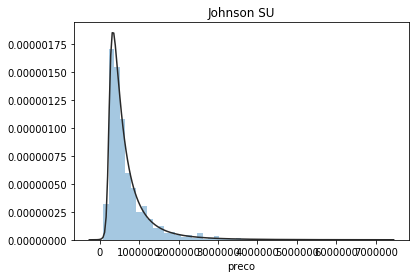

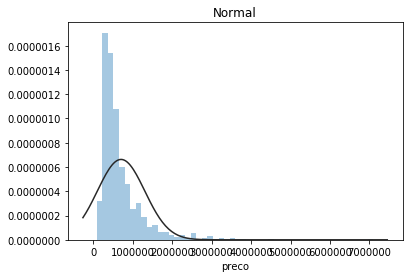

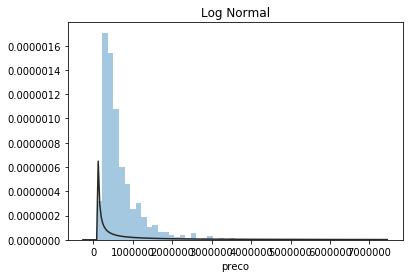

In [15]:
rel_min = np.min(np.log(train['preco']))
train = train.drop(train[np.log(train['preco']) == rel_min].index)

y = train['preco']
plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=st.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm)
plt.show()

Constata-se que os preços não seguem uma distribuição normal e o melhor *fitting* é o da distribuição de Johnson SU, portanto, a fim de aprimorar a questão da distribuição, trabalharemos com a coluna de preços transformada pela Transformada de Box-Cox, com *lambda = 0.25*. Abaixo exibe-se a distribuição antes e depois da transformação.

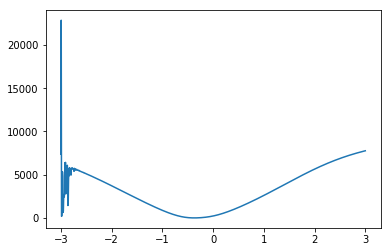

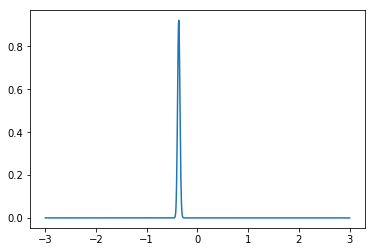

The best BCLambda for stats is -0.3693693693693696 and for pval is -0.3693693693693696


In [36]:
from scipy.stats import boxcox, normaltest

statistic = []
pvalue = []

bclambda_range = np.linspace(-3, 3, 1000)

for bclambda in bclambda_range:
    price_transform = boxcox(train['preco'], lmbda = bclambda)
    stat, pval = normaltest(price_transform)
    statistic.append(stat)
    pvalue.append(pval)
    
plt.plot(bclambda_range, statistic)
plt.show()

plt.plot(bclambda_range, pvalue)
plt.show()

lowest_stat = 8000
closest = -10
best_stat = -1
best_pval = -1
for i in range(len(bclambda_range)):
    if statistic[i] < lowest_stat:
        lowest_stat = statistic[i]
        best_stat = i
    if (abs(pvalue[i]) - 1) > closest:
        closest = (abs(pvalue[i]) - 1)
        best_pval = i

bclambda = bclambda_range[best_pval]
        
print ("The best BCLambda for stats is {} and for pval is {}".format(bclambda_range[best_stat], bclambda_range[best_pval]))

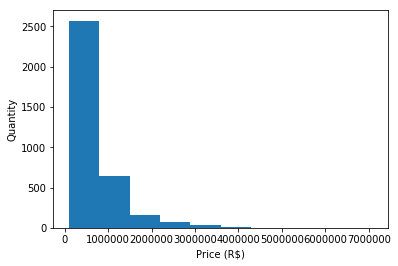

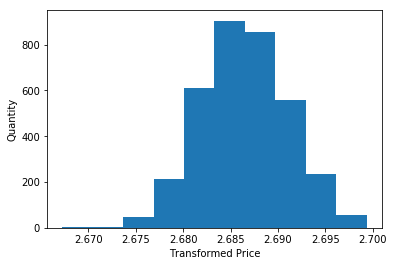

In [17]:
# Plotting bar chart before transformation
plt.figure()
plt.hist(train['preco'],orientation = 'vertical',histtype = 'bar')
plt.xlabel('Price (R$)')
plt.ylabel('Quantity')
plt.show()

# Plotting bar chart after log transformation
price_transform = boxcox1p(train['preco'], bclambda)

plt.figure()
plt.hist(price_transform, orientation = 'vertical',histtype = 'bar')
plt.xlabel('Transformed Price')
plt.ylabel('Quantity')
plt.show()

### Visualização de dados e correlações

Nessa subseção serão demonstradas algumas maneiras de visualizar os dados de nosso conjunto de treino, de maneira a adquirir alguns *insights*, se possível.

Um tipo de visualização julgada interessante foi, devido à característica geográfica da coluna "bairros", o *geographical heatmap*, de forma a tentar verificar uma relação entre a posição geográfica do imóvel e seu preço.

Para isso, listou-se todos os bairros pertencentes ao conjunto e constatou-se que o bairro "Poco" é nada além de uma referência para "Poco da Panela", onde substituiram-se esses valores pelos equivalentes. Da mesma forma identificou-se o bairro "Recife", que foi considerado como "Centro". O gráfico se encontra logo abaixo.

In [18]:
# Getting names for geographical heatmap
bairros = set()
for val in train['bairro']:
    bairros.add(val)
#print (sorted(bairros))

bairros_test = set()
for val in test['bairro']:
    bairros_test.add(val)
print ([i for i in bairros_test if i not in bairros])

# Mudando os valores de bairro de "poco" para "poco da panela" e de "recife" para "centro"
train.loc[train.bairro == 'Poco', 'bairro'] = 'Poco da Panela'
train.loc[train.bairro == 'Recife', 'bairro'] = 'Centro'
test.loc[test.bairro == 'Poco', 'bairro'] = 'Poco da Panela'
test.loc[test.bairro == 'Recife', 'bairro'] = 'Centro'
validation.loc[validation.bairro == 'Poco', 'bairro'] = 'Poco da Panela'
validation.loc[validation.bairro == 'Recife', 'bairro'] = 'Centro'

['Guabiraba', 'Ibura', 'Beberibe', 'Fundao']


In [19]:
# Gettind lat/lon data for geographical heatmap
geo_heatmap = {
    'Bairro' : ['Aflitos',
                'Afogados',
                'Agua Fria',
                'Apipucos',
                'Areias',
                'Arruda', 
                'Barro',
                'Beira Rio',
                'Benfica',
                'Boa Viagem',
                'Boa Vista', 
                'Bongi',
                'Cajueiro',
                'Campo Grande',
                'Casa Amarela',
                'Casa Forte',
                'Caxanga',
                'Centro',
                'Cid Universitaria',
                'Coelhos',
                'Cohab', 
                'Cordeiro',
                'Derby', 
                'Dois Irmaos',
                'Encruzilhada', 
                'Engenho do Meio',
                'Espinheiro',
                'Estancia',
                'Gracas',
                'Guabiraba',
                'Hipodromo',
                'Ilha do Leite',
                'Ilha do Retiro',
                'Imbiribeira', 
                'Ipsep',
                'Iputinga',
                'Jaqueira',
                'Jd S Paulo',
                'Lagoa do Araca',
                'Macaxeira',
                'Madalena',
                'Monteiro',
                'Paissandu',
                'Parnamirim',
                'Piedade',
                'Pina',
                'Poco da Panela',
                'Ponto de Parada', 
                'Prado', 
                'Rosarinho', 
                'S Jose',
                'San Martin',
                'Sancho',
                'Santana',
                'Setubal',
                'Soledade',
                'Sto Amaro',
                'Sto Antonio',
                'Tamarineira',
                'Tejipio',
                'Torre',
                'Torreao',
                'Varzea',
                'Zumbi',
                'Beberibe',
                'Ibura',
                'Fundao'
    ],
    
    'Latitude' : [
        -8.0397908,
        -8.0770326,
        -8.0149198,
        -8.019735,
        -8.0933832,
        -8.0251886,
        -8.1092715,
        -8.0485993,
        -8.0558827,
        -8.1317303,
        -8.0559795,
        -8.0655751,
        -8.0113561,
        -8.0321635,
        -8.0265163,
        -8.0335534,
        -8.026031,
        -8.0588241,
        -8.049515,
        -8.0681711,
        -8.1185361,
        -8.047818,
        -8.0561983,
        -8.0161786,
        -8.0372467,
        -8.0565421,
        -8.0431433,
        -8.0832795,
        -8.0451555,
        -7.9648352,
        -8.0325089,
        -8.0653267,
        -8.0649019,
        -8.1036898,
        -8.1073541,
        -8.0367128,
        -8.036285,
        -8.0809135,
        -8.0944109,
        -8.0131536,
        -8.0535802,
        -8.025565,
        -8.063771,
        -8.0334239,
        -8.0810772,
        -8.0941077,
        -8.0353286,
        -8.0296681,
        -8.0612599,
        -8.0331118,
        -8.0722973,
        -8.0710079,
        -8.0849483,
        -8.0405398,
        -8.1375557,
        -8.0564885,
        -8.0462309,
        -8.0649969,
        -8.0295954,
        -8.0895665,
        -8.045011,
        -8.039835,
        -8.0481699,
        -8.0529718,
        -8.0047804,
        -8.1101563,
        -8.0149872
    ],
    'Longitude' : [
        -34.896209,
        -34.9091753,
        -34.8968235,
        -34.9357679,
        -34.9315393,
        -34.8935035,
        -34.954419,
        -34.9058245,
        -34.9058967,
        -34.902409,
        -34.8953473,
        -34.9180396,
        -34.8858658,
        -34.881336,
        -34.9177915,
        -34.9189597,
        -34.9527201,
        -34.8820243,
        -34.9503969,
        -34.8893137,
        -34.954732,
        -34.9284596,
        -34.8996565,
        -34.9452495,
        -34.8909859,
        -34.9437716,
        -34.8913824,
        -34.9299881,
        -34.9020596,
        -34.9228915,
        -34.8879346,
        -34.89483,
        -34.9051721,
        -34.9107585,
        -34.923195,
        -34.9352704,
        -34.9037314,
        -34.9432807,
        -34.9150252,
        -34.9291854,
        -34.9087328,
        -34.9299881,
        -34.898967,
        -34.9103805,
        -34.9428025,
        -34.8855697,
        -34.924474,
        -34.893451,
        -34.9127452,
        -34.8974905,
        -34.8840889,
        -34.9287891,
        -34.9603088,
        -34.9158124,
        -34.908504,
        -34.8906928,
        -34.878635,
        -34.880349,
        -34.9003716,
        -34.9603088,
        -34.9099178,
        -34.8837971,
        -34.9590198,
        -34.916796,
        -34.8962354,
        -34.9365967,
        -34.8901232
    ]
}

train_bairros = set(train['bairro'].tolist())

geo_dataframe = pd.DataFrame.from_dict(geo_heatmap)

geo_dataframe = geo_dataframe[geo_dataframe['Bairro'].isin(train_bairros)]

geo_dataframe["price"] = pd.Series(train.groupby(["bairro"]).mean()["preco"].values, index = geo_dataframe.index)

import folium
from folium.plugins import HeatMap
max_amount = float(geo_dataframe['price'].max())
hmap = folium.Map(location = [-8.1, -35], zoom_start = 12)
hm_wide = HeatMap (list (zip (geo_dataframe.Latitude.values, geo_dataframe.Longitude.values, geo_dataframe.price.values)),
                   min_opacity = 0.4,
                   max_val = max_amount,
                       radius = 17,
                   blur = 15,
                   max_zoom = 1
                  )
hmap.add_child(hm_wide)

Uma correlação entre as coordenadas geográficas dos bairros e seus preços médios não é tão intuitiva. Dessa maneira, serão incluídas colunas com valores referentes às latitudes e longitudes de cada um.

In [20]:
# Building auxiliar dicts
lat_dict = {}
lon_dict = {}
for i in range(len(geo_heatmap['Bairro'])):
    bairro = geo_heatmap['Bairro'][i]
    lat = geo_heatmap['Latitude'][i]
    lon = geo_heatmap['Longitude'][i]
    lat_dict[bairro] = lat
    lon_dict[bairro] = lon

# Method that adds latitude and longitude columns
def add_lat_lon_columns (df):
    df ['lat'] = df['bairro'].map(lat_dict)
    df ['lon'] = df['bairro'].map(lon_dict)
    
# Adding columns to train and test sets
add_lat_lon_columns(train)
add_lat_lon_columns(test)
add_lat_lon_columns(validation)

Também julgou-se interessante o entendimento das correlações entre as *features* categóricas e o preço, a partir dos gráficos abaixo

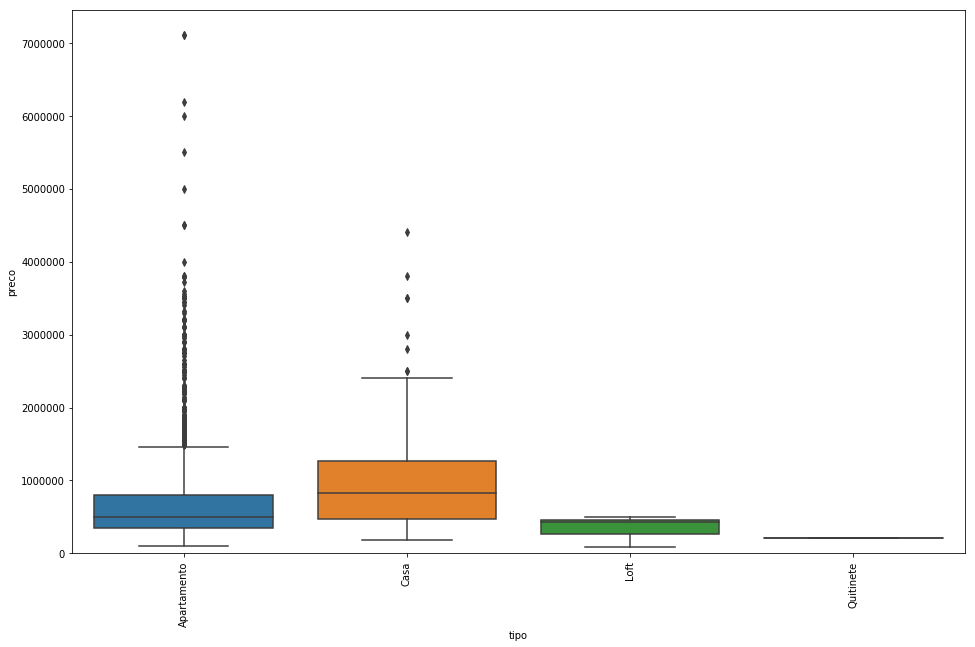

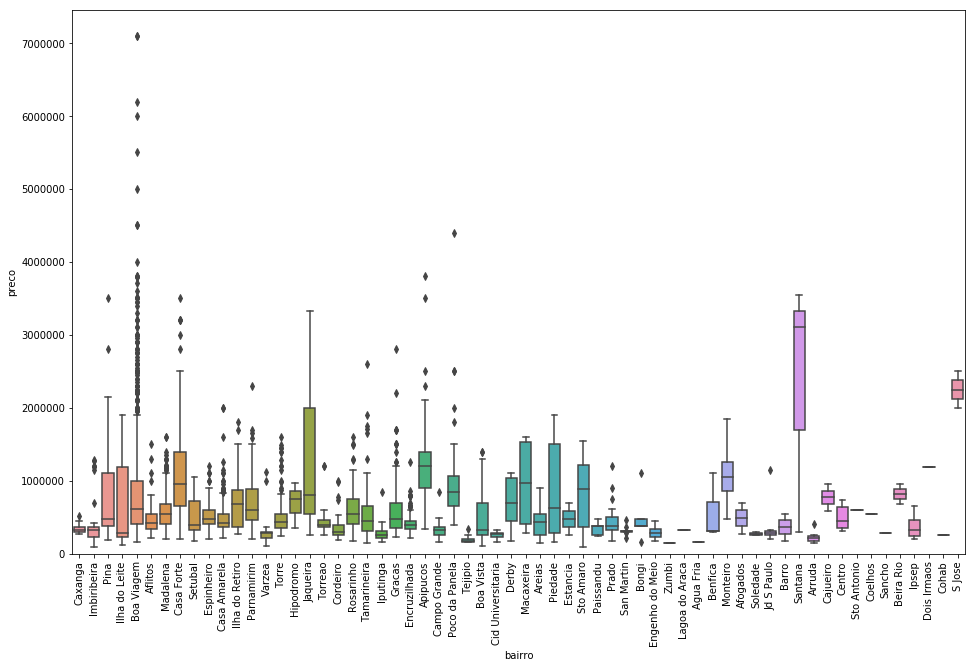

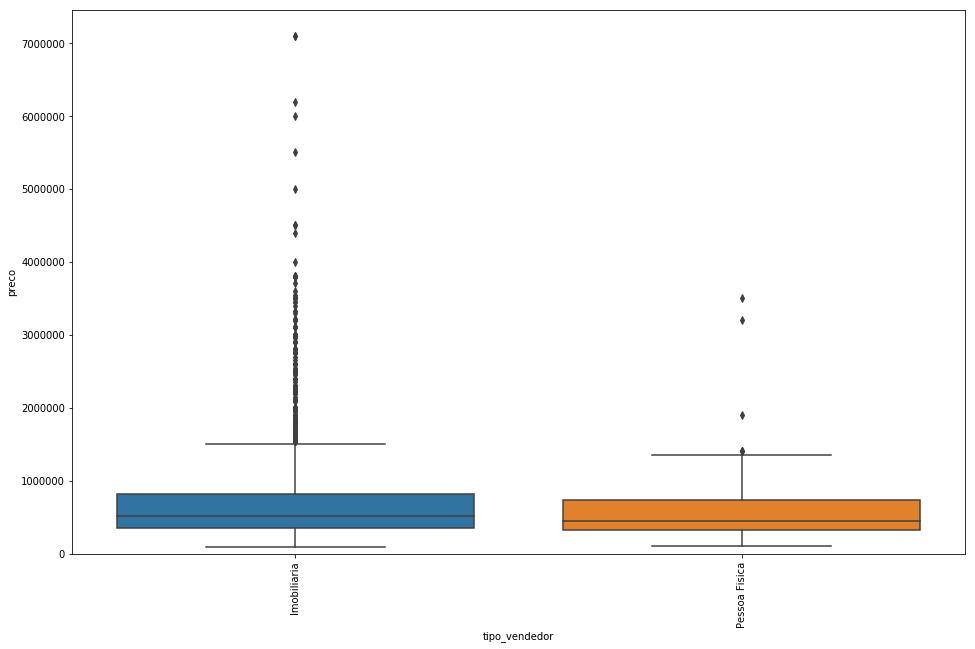

In [21]:
# Understanding correlations between categorical features and the price
categorical_features = train.select_dtypes(include=[np.object])

columns = [i for i in categorical_features if i != 'Id']
for var in columns:
    data = pd.concat([train['preco'], train[var]], axis=1)
    f, ax = plt.subplots(figsize=(16, 10))
    fig = sns.boxplot(x=var, y="preco", data=data)
    fig.axis(ymin=0);
    xt = plt.xticks(rotation=45)
    plt.xticks(rotation=90)
    plt.show()

Antes de trabalhar com as variáveis numéricas, será feita a normalização de todas.

Após a normalização, serão calculados os índices de correlação entre as variáveis numéricas e exibidas as que tiverem correlação positiva.

In [22]:
# Finding correlation between price and numeric features
correlation = train.corr()

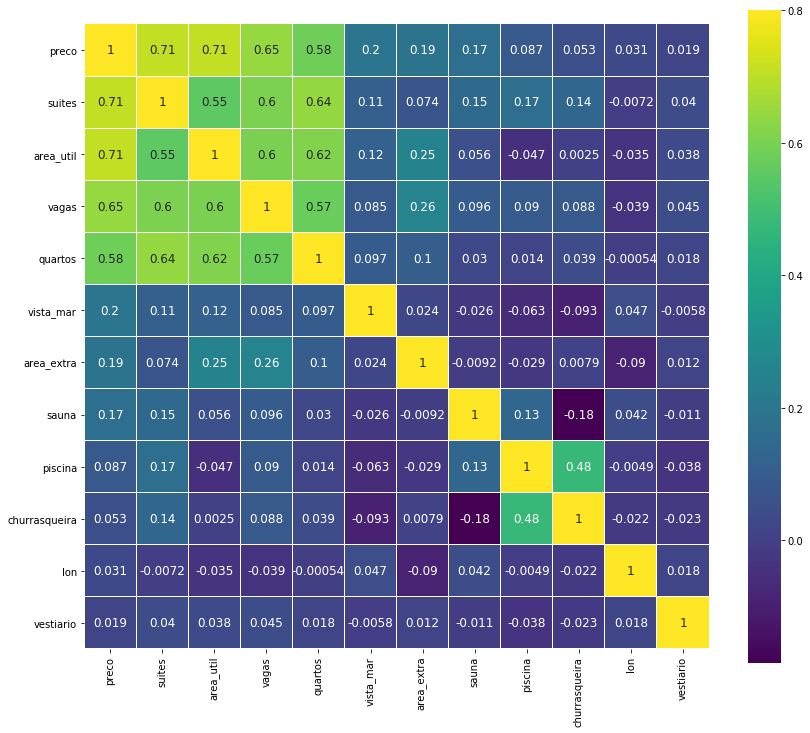

In [23]:
# Heatmap of positive correlation features
k = len([i for i in correlation['preco'] if abs(i) >= 0.05])
cols = correlation.nlargest(k,'preco')['preco'].index
cm = np.corrcoef(train[cols].values.T)
f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(cm, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='viridis',
            linecolor="white",xticklabels = cols.values ,annot_kws = {'size':12},yticklabels = cols.values)
plt.show()

Serão exibidos também gráficos par a par dos *features* numéricos e a tentativa de uma função linear que concorde com a tendência dos dados

/home/gabriel-milan/.local/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


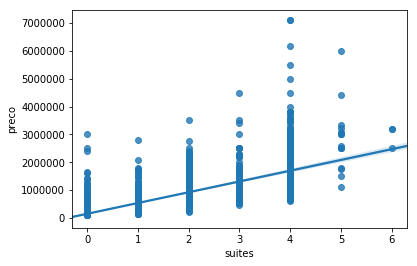

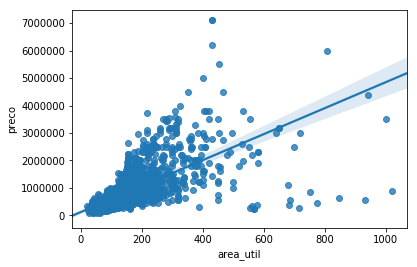

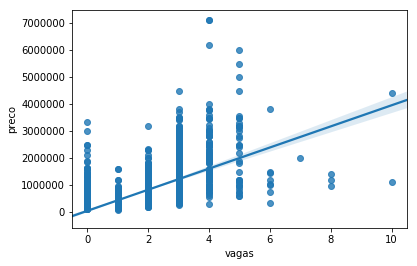

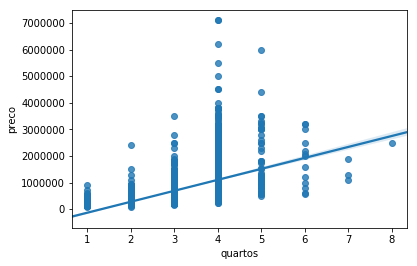

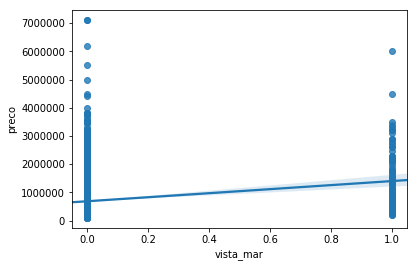

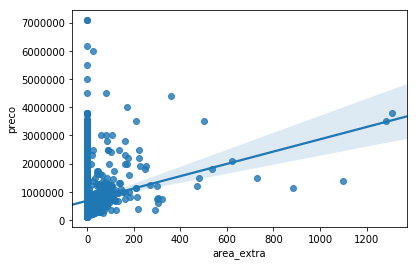

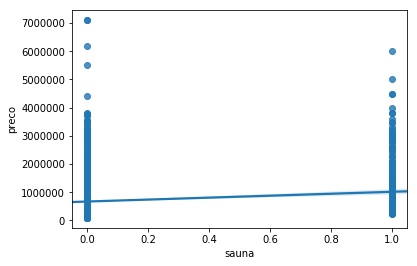

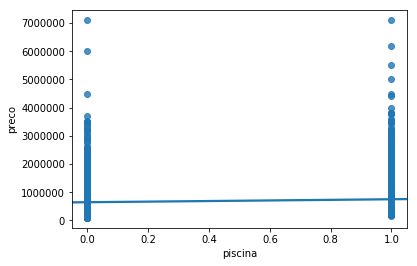

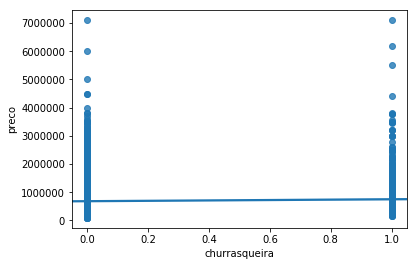

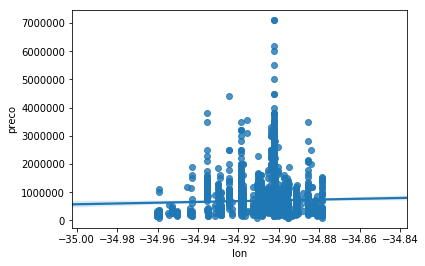

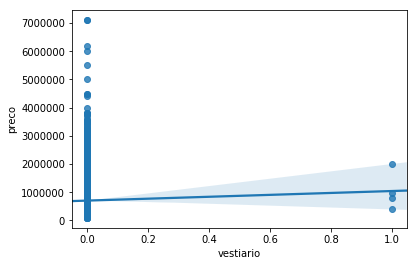

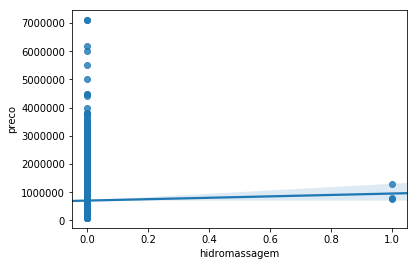

In [24]:
# Pair plotting in order to understand better correlation by fitting a simple linear
corr_preco = correlation['preco']
corr_series = corr_preco[corr_preco > 0].sort_values(ascending = False)

series_labels = list(corr_series.index)

for feature in series_labels[1:]:
    if (feature != 'Id'):
        plt.figure()
        scatter_plot = pd.concat([train['preco'], train[feature]], axis = 1)
        sns.regplot(x = feature, y = 'preco', data = scatter_plot, scatter = True, fit_reg = True)
        plt.show()

## Selecionando *features* e fazendo predições

Nessa seção serão abordados os métodos utilizados para seleção de *features* e realização de predições de acordo com os dados de teste.

De início, algumas bibliotecas úteis foram inclusas, delas:
* *sklearn* com utilidades de aprendizado de máquina e implementação de alguns modelos de regressão;
* *xgboost* para implementação da regressão com XGBoost;
* *warnings* para filtragem de avisos;
* *scipy* com utilidades do ramo da estatística.

In [25]:
# Imports
from sklearn.feature_selection import SelectKBest,f_regression
from sklearn.linear_model import LinearRegression,BayesianRidge,ElasticNet,Lasso,SGDRegressor,Ridge
from sklearn.kernel_ridge import KernelRidge
from sklearn.preprocessing import LabelEncoder,Imputer,OneHotEncoder,RobustScaler,StandardScaler,Imputer
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA,KernelPCA
from sklearn.ensemble import ExtraTreesRegressor,GradientBoostingRegressor,RandomForestRegressor,VotingClassifier
from sklearn.model_selection import cross_val_score,KFold,GridSearchCV,RandomizedSearchCV,StratifiedKFold,train_test_split
from sklearn.base import BaseEstimator,clone,TransformerMixin,RegressorMixin
from sklearn.svm import LinearSVR,SVR
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import skew
from scipy.stats.stats import pearsonr

Começa-se avaliando a quantidade de categorias que cada atributo categórico possui.

In [26]:
# Evaluating unique categories in train and test dataframes
for column_name in train.columns:    
    if train[column_name].dtypes == 'object':
        unique_category = len(train[column_name].unique())
        print("Feature '{column_name}' has '{unique_category}' unique categories".format(column_name = column_name,
                                                                                         unique_category=unique_category))

for column_name in test.columns:
    if test[column_name].dtypes == 'object':
        unique_category = len(test[column_name].unique())
        print("Features in test set '{column_name}' has '{unique_category}' unique categories".format(column_name = column_name, unique_category=unique_category))

Feature 'tipo' has '4' unique categories
Feature 'bairro' has '62' unique categories
Feature 'tipo_vendedor' has '2' unique categories
Features in test set 'tipo' has '3' unique categories
Features in test set 'bairro' has '56' unique categories
Features in test set 'tipo_vendedor' has '2' unique categories


A fim de avaliar e manipular de maneira mais eficiente os conjuntos de dados, uniu-se ambos os conjuntos de treino e teste, excluindo as colunas de 'Id' e 'Preço'.

In [27]:
# Joining train and test data, in order to ease the preprocessing
full = pd.concat([train, test, validation], ignore_index = True)
#full.drop('Id', axis = 1, inplace = True)
full.drop(['preco'], axis=1, inplace=True)

Verifica-se agora se há algum dado faltante nas colunas de *full*, que é a união dos conjuntos de treino e teste.

In [28]:
# Checking for missing values
missing_values = full.isnull().sum()
missing_values[missing_values>0].sort_values(ascending = False)

full[full.isnull().any(axis=1)].head()

,Id,area_extra,area_util,bairro,children care,churrasqueira,esquina,estacionamento,hidromassagem,lat,...,s_festas,s_ginastica,s_jogos,sauna,suites,tipo,tipo_vendedor,vagas,vestiario,vista_mar


Uma vez que não há valores faltantes, será feito agora o *encoding* dos atributos categóricos.

Será feito encoding com *one-hot*, ou seja, haverá uma coluna para cada categoria e, a partir disso, será possível colocar o valor *1* para verdadeiro e *0* para falso.

In [29]:
# Normalizing data
def normalize_data (df, numeric_features):
    for column in numeric_features:
        if column == 'lat' or column == 'lon':
            df[column] = df[column] / df[column].max()
        df[column] = df[column] / df[column].max()

numeric_features = [i for i in train.select_dtypes(include=[np.number]) if (i != 'Id') and (i != 'preco')]

normalize_data (full, numeric_features)

In [30]:
# One hot encoding
full = pd.get_dummies(full)

Após o *encoding*, será feita a separação dos dados novamente para treino e teste.

Com a separação realizada, os dados serão colocados em escala e serão transformados pela Análise dos Componentes Principais, que gerará *features* posteriormente utilizados.

In [31]:
# Separating train and test data
train_Ids = set(train['Id'].tolist())
test_Ids = set(test['Id'].tolist())
valid_Ids = set(validation['Id'].tolist())

X_train = full[full['Id'].isin(train_Ids)]
X_train.drop('Id', axis = 1, inplace = True)
y_train = train.preco

print ("Shape of X_train: {}".format(X_train.shape))

X_test = full[full['Id'].isin(test_Ids)]
X_test.drop('Id', axis = 1, inplace = True)

print ("Shape of X_test: {}".format(X_test.shape))

X_valid = full[full['Id'].isin(valid_Ids)]
X_valid.drop('Id', axis = 1, inplace = True)

print ("Shape of X_valid: {}".format(X_valid.shape))

# Scaling data
robust_scaler = RobustScaler()
X_train_scaled = robust_scaler.fit(X_train).transform(X_train)
X_test_scaled = robust_scaler.transform(X_test)

y_train_transformed = boxcox1p(train.preco, bclambda)

Shape of X_train: (3489, 94)
Shape of X_test: (2000, 94)
Shape of X_valid: (1170, 94)


Antes de iniciar os testes, a função de erro médio quadrático deve ser definida, de forma a comparar os modelos.

In [32]:
# Define Root Mean Square Error w/ Cross-validation 
def rmse_cv (model, X, y):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring = "neg_mean_squared_error", cv = 5))
    return rmse

# Define Pure Root Mean Square Error
from sklearn.metrics import mean_squared_error
from math import sqrt
def rmse (y_actual, y_predicted):
     return sqrt(mean_squared_error(y_actual, y_predicted))

Será feito agora um estudo para escolha de *features* baseando-se no "*Feature importance*" do *XGBoost Regressor*, que considera o número de vezes que um atributo aparece na árvore, e também por eliminação recursiva de *feature* e seleção por validação cruzada.

Abaixo inicia-se a análise com o *XGBoost Regressor*

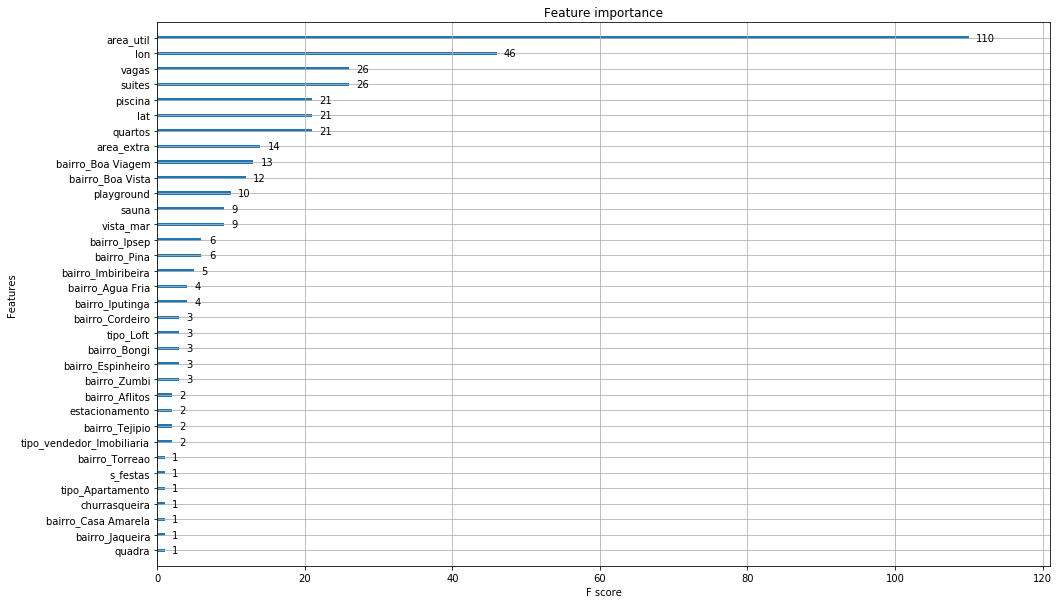

In [33]:
from xgboost import plot_importance

model = XGBRegressor(nthread = -1)
model.fit(X_train, y_train_transformed)

f, ax = plt.subplots(figsize=(16, 10))
plot_importance(model, ax = ax)
plt.show()

Analisa-se agora um limiar ideal de corte para as features, baseando-se no gráfico acima.

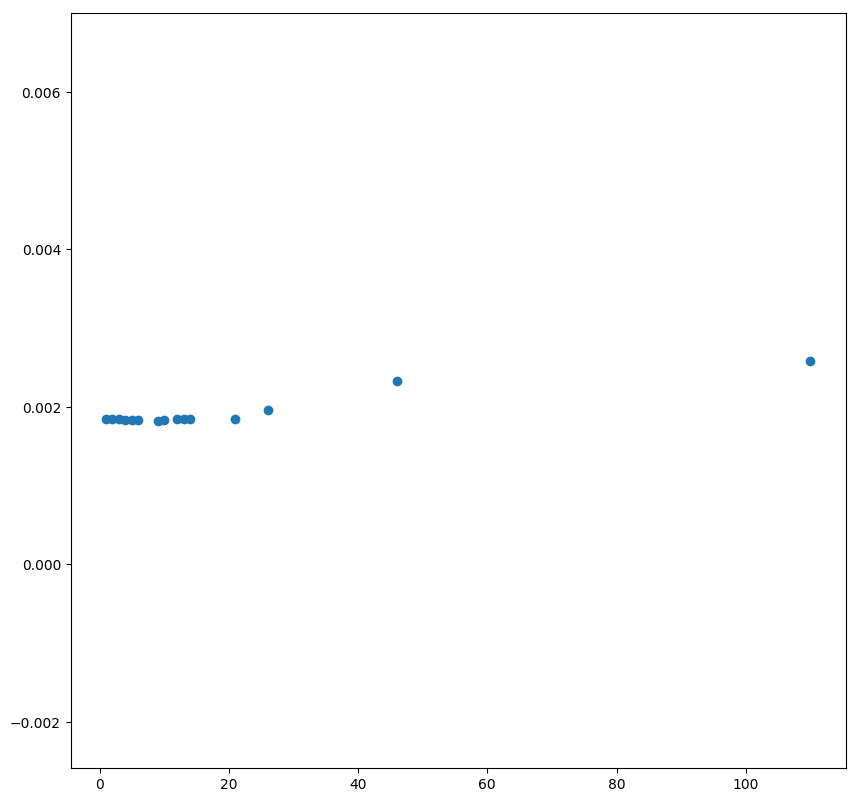

Your best threshold is 46
With this threshold, the features you want are: ['area_util', 'lon']


In [34]:
# Getting chart data
fscore_dict = model.get_booster().get_fscore()

# Getting threshold values
threshold_values = []
for feature in fscore_dict:
    if fscore_dict[feature] not in threshold_values:
        threshold_values.append(fscore_dict[feature])

# Building lists for later plotting
scores_y = []
        
# Setting a range for the threshold
for threshold in threshold_values:
    feature_list = [feature for feature in X_train.columns if (feature in fscore_dict) and (fscore_dict[feature] >=  threshold)]
    scores_y.append(rmse_cv(model, X_train[feature_list], y_train_transformed).mean())
    
# Plotting
plt.figure(num=None, figsize=(10, 10), dpi=100, facecolor='w', edgecolor='k')
plt.scatter(threshold_values, scores_y)
plt.show()

# Getting best threshold
min_value = 1000000000000000
best_threshold = 1000
for i in range(len(threshold_values)):
    if scores_y [i] < min_value:
        best_threshold = threshold_values[i]

print ("Your best threshold is {}".format(best_threshold))
xgb_features_list = [feature for feature in fscore_dict if fscore_dict[feature] >= best_threshold]
print ("With this threshold, the features you want are: {}".format(xgb_features_list))

A seguir a análise com o *RFECV (Recursive Feature Extraction w/ Cross-Validation selection)*. O código foi comentado de forma a não tomar tempo de processamento do leitor. Para executá-lo e reproduzir os resultados, apenas retire os comentários.

In [35]:
from sklearn.feature_selection import RFECV

model = GradientBoostingRegressor(learning_rate = 0.082, loss = 'ls', n_estimators = 620)
selector = RFECV (model)
selector.fit(X_train, y_train_transformed)

RFECV_mask = selector.support_
#print (RFECV_mask)

# Output:
#[ True  True False  True False  True False  True  True  True  True False
#  True  True False False  True  True  True False  True False  True  True
# False  True False False False False  True  True  True  True False False
# False False False False False False False  True False False False False
# False False False False False False False False False  True  True False
# False False False False  True False False  True False  True False False
#  True False False False  True False False False False False False False
#  True False  True  True  True  True False  True False]

#RFECV_mask = np.array([ True,  True, False,  True, False,  True, False,  True,  True,  True,  True, False,
#  True,  True, False, False,  True,  True,  True, False,  True, False,  True,  True,
# False,  True, False, False, False, False,  True,  True,  True,  True, False, False,
# False, False, False, False, False, False, False,  True, False, False, False, False,
# False, False, False, False, False, False, False, False, False,  True,  True, False,
# False, False, False, False,  True, False, False,  True, False,  True, False, False,
#  True, False, False, False,  True, False, False, False, False, False, False, False,
#  True, False,  True,  True,  True,  True, False,  True, False])

rfecv_features_list = []
for i in range(len(RFECV_mask)):
    if RFECV_mask[i] == True:
        rfecv_features_list.append(X_train.columns[i])
    
print ("For this metod, the features you want are: {}".format(rfecv_features_list))

For this metod, the features you want are: ['area_extra', 'area_util', 'churrasqueira', 'lat', 'lon', 'piscina', 'playground', 'quartos', 's_festas', 'sauna', 'suites', 'vagas', 'vista_mar', 'bairro_Agua Fria', 'bairro_Boa Viagem', 'bairro_Boa Vista', 'bairro_Cordeiro', 'bairro_Imbiribeira', 'bairro_Ipsep', 'bairro_Iputinga', 'bairro_Zumbi', 'tipo_Casa', 'tipo_Loft', 'tipo_vendedor_Imobiliaria']


Nesse momento novamente os dados de treino e teste serão manipulados de forma a recortá-los de acordo com as features selecionadas anteriormente, comparando as escolhas.

In [37]:
# Raw X data
train_Ids = set(train['Id'].tolist())
test_Ids = set(test['Id'].tolist())
valid_Ids = set(validation['Id'].tolist())

X_train = full[full['Id'].isin(train_Ids)]
X_train.drop('Id', axis = 1, inplace = True)

X_test = full[full['Id'].isin(test_Ids)]
X_test.drop('Id', axis = 1, inplace = True)

X_valid = full[full['Id'].isin(valid_Ids)]
X_valid.drop(['Id'], axis = 1, inplace = True)

# Cropped X_data
X_train_cropped_xgb = X_train[xgb_features_list]
X_test_cropped_xgb = X_test[xgb_features_list]
X_train_cropped_rfecv = X_train[rfecv_features_list]
X_test_cropped_rfecv = X_test[rfecv_features_list]
X_valid_cropped_rfecv = X_valid[rfecv_features_list]

# Scaling data
robust_scaler = RobustScaler()
X_train_scaled = robust_scaler.fit(X_train).transform(X_train)
X_test_scaled = robust_scaler.transform(X_test)
X_train_cropped_xgb_scaled = robust_scaler.fit(X_train_cropped_xgb).transform(X_train_cropped_xgb)
X_test_cropped_xgb_scaled = robust_scaler.transform(X_test_cropped_xgb)
X_train_cropped_rfecv_scaled = robust_scaler.fit(X_train_cropped_rfecv).transform(X_train_cropped_rfecv)
X_test_cropped_rfecv_scaled = robust_scaler.transform(X_test_cropped_rfecv)
X_valid_cropped_rfecv_scaled = robust_scaler.transform(X_valid_cropped_rfecv)

# Transforming data with PCA
#pca = PCA(0.95)
#X_train_scaled_transformed = pca.fit(X_train_scaled).transform(X_train_scaled)
#X_test_scaled_transformed = pca.transform(X_test_scaled)
#X_train_cropped_xgb_scaled_transformed = pca.fit(X_train_cropped_xgb_scaled).transform(X_train_cropped_xgb_scaled)
#X_test_cropped_xgb_scaled_transformed = pca.transform(X_test_cropped_xgb_scaled)
#X_train_cropped_rfecv_scaled_transformed = pca.fit(X_train_cropped_rfecv_scaled).transform(X_train_cropped_rfecv_scaled)
#X_test_cropped_rfecv_scaled_transformed = pca.transform(X_test_cropped_rfecv_scaled)
y_train_transformed = boxcox1p(train.preco, bclambda)
y_valid_transformed = boxcox1p(validation.preco, bclambda)

Serão utilizados os seguintes modelos de regressão:
* Regressão linear;
* Regressão de Lasso;
* Regressão de Florestas Aleatórias;
* Regressor de *boost* de gradiente;
* Regressor de vetores de suporte;
* Regressor *XGBoost*.

Agora será feito o teste inicial, ou seja, sem *tuning* de hiperparâmetros, dos modelos supracitados para os seguintes conjuntos de dados:
* *X_train*: conjunto de input sem tratamento;
* *X_train_cropped_xgb*: conjunto de input com features selecionadas pelo *XGBoost Regressor*;
* *X_train_cropped_rfecv*: conjunto de input com features selecionadas pelo *RFECV*;
* *X_train_scaled*: conjunto de input sem recorte após processo de escala;
* *X_train_cropped_xgb_scaled*: conjunto *X_train_cropped_xgb* após processo de escala;
* *X_train_cropped_rfecv_scaled*: conjunto *X_train_cropped_rfecv* após processo de escala;

In [38]:
# Defining list of models we'll try (without hyper-parameters tuning)
models = [
    LinearRegression(),
    Lasso(alpha=0.01,max_iter=10000),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    SVR(),
    XGBRegressor()
]
# Labels of the models
names = [
    'Linear Regression',
    'Lasso Regression',
    'Random Forest Regression',
    'Gradient Boosting Regression',
    'Support Vector Regression',
    'XGBoost Regression'
]

# Manipulating input
X_list = [
    X_train,
    X_train_cropped_xgb,
    X_train_cropped_rfecv,
    X_train_scaled,
    X_train_cropped_xgb_scaled,
    X_train_cropped_rfecv_scaled
]

# Getting RMSE for all models (no hyper-parameters tuning)
for X in X_list:
    print ("=" * 15)
    lower_rmse = 1000
    higher_rmse = 0
    lower_rmse_name = ""
    higher_rmse_name = ""
    for model,name in zip(models,names):
        score = rmse_cv (model, X, y_train_transformed)
        if (score.mean() < lower_rmse):
            lower_rmse = score.mean()
            lower_rmse_name = name
        if (score.mean() > higher_rmse):
            higher_rmse = score.mean()
            higher_rmse_name = name
        print("{}: {}, {}".format(name,score.mean(),score.std()))
    print ("--- Best result: {} with {}".format(lower_rmse_name, lower_rmse))
    print ("--- Worst result: {} with {}".format(higher_rmse_name, higher_rmse))

Linear Regression: 295093898.50579816, 575635253.6720628
Lasso Regression: 0.004576194962354621, 6.343700675939725e-05
Random Forest Regression: 0.0018792987602836652, 0.00011735070876692997
Gradient Boosting Regression: 0.0018103044222899111, 9.233801976407683e-05
Support Vector Regression: 0.005466460318726286, 0.0001154442943226701
XGBoost Regression: 0.0018436075651456988, 0.00010306163817122891
--- Best result: Gradient Boosting Regression with 0.0018103044222899111
--- Worst result: Linear Regression with 295093898.50579816
Linear Regression: 0.003407412337942682, 0.00016020980547303725
Lasso Regression: 0.004576194962354621, 6.343700675939725e-05
Random Forest Regression: 0.002400258637022288, 0.00012070985516432076
Gradient Boosting Regression: 0.0022992330632169147, 8.172439128355943e-05
Support Vector Regression: 0.005466460318726286, 0.0001154442943226701
XGBoost Regression: 0.0023316775799565453, 7.250227805591911e-05
--- Best result: Gradient Boosting Regression with 0.002

É possível observar que conjuntos de dados diferentes geram resultados diferentes com modelos diferentes. De modo a aprimorar os resultados, será feita agora o *tuning* dos hiperparâmetros, com *GridSearch*, baseando-se no *dataset* que se saiu melhor para cada modelo.

In [39]:
# Grid search for hyper-parameters
class grid():
    def __init__ (self, model):
        self.model = model
    def grid_get (self, X, y, param_grid):
        grid_search = GridSearchCV(self.model, param_grid, scoring='neg_mean_squared_error')
        grid_search.fit(X, y)
        print(grid_search.best_params_, np.sqrt(-grid_search.best_score_))
        grid_search.cv_results_['mean_test_score'] = np.sqrt(-grid_search.cv_results_['mean_test_score'])
        print(pd.DataFrame(grid_search.cv_results_)[['params', 'mean_test_score', 'std_test_score']])

Uma flag denominada *make_search* será definida como *False* para pular a parte de *GridSearch*, devido ao seu altíssimo custo computacional. Os resultados são demonstrados posteriormente.

In [40]:
make_search = True

In [41]:
# Grid search for Lasso
if (make_search):
    dataset = X_train_scaled
    grid(Lasso()).grid_get(dataset, y_train_transformed,
                           {'alpha':np.linspace(0, .01, 21),
                            'max_iter':[max_iter]})
    
# Found alpha = 0.0

{'alpha': 0.0, 'max_iter': 15000} 0.0021117647153383453
                                               params  mean_test_score  \
0                   {'alpha': 0.0, 'max_iter': 15000}         0.002112   
1                {'alpha': 0.0005, 'max_iter': 15000}         0.002502   
2                 {'alpha': 0.001, 'max_iter': 15000}         0.002768   
3                {'alpha': 0.0015, 'max_iter': 15000}         0.003098   
4                 {'alpha': 0.002, 'max_iter': 15000}         0.003449   
5                {'alpha': 0.0025, 'max_iter': 15000}         0.003781   
6                 {'alpha': 0.003, 'max_iter': 15000}         0.004123   
7                {'alpha': 0.0035, 'max_iter': 15000}         0.004434   
8                 {'alpha': 0.004, 'max_iter': 15000}         0.004579   
9   {'alpha': 0.0045000000000000005, 'max_iter': 1...         0.004579   
10                {'alpha': 0.005, 'max_iter': 15000}         0.004579   
11               {'alpha': 0.0055, 'max_iter': 15000}   

In [42]:
# Grid search for Random Forest Regressor
if (make_search):
    dataset = X_train
    grid(RandomForestRegressor()).grid_get(dataset, y_train_transformed,
                                          {'n_estimators' : np.linspace(100, 500, 6).astype(int),
                                          'oob_score' : [True, False],
                                          'n_jobs' : [-1]})
    
# Found n_estimators = 340, oob_score = False

{'n_estimators': 340, 'oob_score': False, 'n_jobs': -1} 0.0018232901175532566
                                               params  mean_test_score  \
0   {'n_estimators': 100, 'oob_score': True, 'n_jo...         0.001833   
1   {'n_estimators': 100, 'oob_score': False, 'n_j...         0.001834   
2   {'n_estimators': 180, 'oob_score': True, 'n_jo...         0.001838   
3   {'n_estimators': 180, 'oob_score': False, 'n_j...         0.001830   
4   {'n_estimators': 260, 'oob_score': True, 'n_jo...         0.001832   
5   {'n_estimators': 260, 'oob_score': False, 'n_j...         0.001828   
6   {'n_estimators': 340, 'oob_score': True, 'n_jo...         0.001830   
7   {'n_estimators': 340, 'oob_score': False, 'n_j...         0.001823   
8   {'n_estimators': 420, 'oob_score': True, 'n_jo...         0.001825   
9   {'n_estimators': 420, 'oob_score': False, 'n_j...         0.001830   
10  {'n_estimators': 500, 'oob_score': True, 'n_jo...         0.001827   
11  {'n_estimators': 500, 'oob_sco

In [43]:
# Grid search for SVR
if (make_search):
    dataset = X_train_cropped_xgb_scaled
    grid(SVR()).grid_get(dataset, y_train_transformed, {
        'kernel' : ['rbf', 'poly'],
        'degree' : range(1, 5),
        'max_iter' : [15000]
    })
    
# Found kernel = 'rbf', degree = 1

{'kernel': 'rbf', 'max_iter': 15000, 'degree': 1} 0.0054555313364010646
                                              params  mean_test_score  \
0  {'kernel': 'rbf', 'max_iter': 15000, 'degree': 1}         0.005456   
1  {'kernel': 'poly', 'max_iter': 15000, 'degree'...         0.005456   
2  {'kernel': 'rbf', 'max_iter': 15000, 'degree': 2}         0.005456   
3  {'kernel': 'poly', 'max_iter': 15000, 'degree'...         0.005456   
4  {'kernel': 'rbf', 'max_iter': 15000, 'degree': 3}         0.005456   
5  {'kernel': 'poly', 'max_iter': 15000, 'degree'...         0.005456   
6  {'kernel': 'rbf', 'max_iter': 15000, 'degree': 4}         0.005456   
7  {'kernel': 'poly', 'max_iter': 15000, 'degree'...         0.005456   

   std_test_score  
0        0.000001  
1        0.000001  
2        0.000001  
3        0.000001  
4        0.000001  
5        0.000001  
6        0.000001  
7        0.000001  


In [44]:
# Grid search for Gradient Boost Regressor
if (make_search):
    dataset = X_train_cropped_rfecv
    grid(GradientBoostingRegressor()).grid_get(dataset, y_train_transformed, {
        'loss' : ['ls', 'huber'],
        'learning_rate' : np.linspace(0.01, 0.1, 11),
        'n_estimators' : np.linspace(300, 700, 6).astype(int)
    })
    
# Found learning_rate = 0.073, loss = 'ls', n_estimators = 460

{'n_estimators': 460, 'loss': 'ls', 'learning_rate': 0.073} 0.0017659033195183858
                                                params  mean_test_score  \
0    {'n_estimators': 300, 'loss': 'ls', 'learning_...         0.001960   
1    {'n_estimators': 380, 'loss': 'ls', 'learning_...         0.001898   
2    {'n_estimators': 460, 'loss': 'ls', 'learning_...         0.001865   
3    {'n_estimators': 540, 'loss': 'ls', 'learning_...         0.001845   
4    {'n_estimators': 620, 'loss': 'ls', 'learning_...         0.001830   
5    {'n_estimators': 700, 'loss': 'ls', 'learning_...         0.001820   
6    {'n_estimators': 300, 'loss': 'huber', 'learni...         0.001976   
7    {'n_estimators': 380, 'loss': 'huber', 'learni...         0.001917   
8    {'n_estimators': 460, 'loss': 'huber', 'learni...         0.001884   
9    {'n_estimators': 540, 'loss': 'huber', 'learni...         0.001863   
10   {'n_estimators': 620, 'loss': 'huber', 'learni...         0.001852   
11   {'n_estimator

Após o *tuning* de hiper-parâmetros, os resultados serão revistos.

In [45]:
# Defining list of models with hyper-parameters tuned
models = [
    LinearRegression(),
    Lasso(alpha = 0.0, max_iter = max_iter),
    RandomForestRegressor(n_estimators = 340, n_jobs = -1, oob_score = False),
    SVR(kernel = 'rbf', degree = 1, max_iter = max_iter),
    GradientBoostingRegressor(learning_rate = 0.073, loss = 'ls', n_estimators = 460),
    XGBRegressor(nthread = -1)
]
# Labels of the models
names = [
    'Linear Regression',
    'Lasso Regression',
    'Random Forest Regression',
    'Support Vector Regression',
    'Gradient Boosting Regression',
    'XGBoost Regression'
]

# Manipulating input
X_list = [
    X_train,
    X_train_cropped_xgb,
    X_train_cropped_rfecv,
    X_train_scaled,
    X_train_cropped_xgb_scaled,
    X_train_cropped_rfecv_scaled
]

# Getting RMSE for all models (after hyper-parameters tuning)
for X in X_list:
    print ("=" * 15)
    lower_rmse = 1000
    higher_rmse = 0
    lower_rmse_name = ""
    higher_rmse_name = ""
    for model,name in zip(models,names):
        score = rmse_cv (model, X, y_train_transformed)
        if (score.mean() < lower_rmse):
            lower_rmse = score.mean()
            lower_rmse_name = name
        if (score.mean() > higher_rmse):
            higher_rmse = score.mean()
            higher_rmse_name = name
        print("{}: {}, {}".format(name,score.mean(),score.std()))
    print ("--- Best result: {} with {}".format(lower_rmse_name, lower_rmse))
    print ("--- Worst result: {} with {}".format(higher_rmse_name, higher_rmse))

Linear Regression: 295093898.50579816, 575635253.6720628
Lasso Regression: 0.0021041122826220417, 6.254930876890663e-05
Random Forest Regression: 0.0018167660696356003, 0.0001301833683178622
Support Vector Regression: 0.005466460318726286, 0.0001154442943226701
Gradient Boosting Regression: 0.0017843395906936576, 0.0001039282497142838
XGBoost Regression: 0.0018436075651456988, 0.00010306163817122891
--- Best result: Gradient Boosting Regression with 0.0017843395906936576
--- Worst result: Linear Regression with 295093898.50579816
Linear Regression: 0.003407412337942682, 0.00016020980547303725
Lasso Regression: 0.003407412337942683, 0.00016020980547303638
Random Forest Regression: 0.002359640170424292, 0.00011825711601096223
Support Vector Regression: 0.005466460318726286, 0.0001154442943226701
Gradient Boosting Regression: 0.0022826808614043784, 0.0001030909898270595
XGBoost Regression: 0.0023316775799565453, 7.250227805591911e-05
--- Best result: Gradient Boosting Regression with 0.00

Com os resultados acima, podemos ver que após o processo de escala os resultados são, no geral, melhores. Desconsiderando *datasets* pré-escala, os melhores modelos, seus respectivos *datasets* e os erros médios quadráticos associados foram os seguintes:

* 1º: *Gradient Boosting Regression* com *X_train_cropped_rfecv_scaled*: 0.2241625;
* 2º: *Gradient Boosting Regression* com *X_train_cropped_xgb_scaled*: 0.2249785;
* 3º: *Gradient Boosting Regression* com *X_train_scaled*: 0.2252590;
* 4º: *Random Forest Regression* com *X_train_scaled*: 0.2265576;
* 5º: *Random Forest Regression* com *X_train_cropped_rfecv_scaled*: 0.2268213;
* 6º: *Random Forest Regression* com *X_train_cropped_xgb_scaled*: 0.2299492;
* 7º: *XGBoost Regression* com *X_train_cropped_rfecv_scaled*: 0.2335460;
* 8º: *XGBoost Regression* com *X_train_scaled*: 0.2336808;
* 9º: *XGBoost Regression* com *X_train_cropped_xgb_scaled*: 0.2337243;
* 10º: *Support Vector Regression* com *X_train_cropped_rfecv_scaled*: 0.2339725.

A partir desses resultados, serão consideradas possíveis combinações entre os seguintes modelos, supracitados, a fim de tentar adquirir melhores resultados:
* *Gradient Boosting Regression*;
* *Random Forest Regression*;
* *XGBoost Regression*;
* *Support Vector Regression*;


In [46]:
# Declaring models
rfregressor = RandomForestRegressor(n_estimators = 340, n_jobs = -1, oob_score = False)
#rfregressor.fit(X_train_scaled, y_train_transformed)

svregressor = SVR(kernel = 'rbf', degree = 1, max_iter = max_iter)
#svregressor.fit(X_train_cropped_rfecv_scaled, y_train_transformed)

gbregressor = GradientBoostingRegressor(learning_rate = 0.073, loss = 'ls', n_estimators = 460)
#gbregressor.fit(X_train_cropped_rfecv_scaled, y_train_transformed)

xgbregressor = XGBRegressor(nthread = -1)
#xgbregressor.fit(X_train_cropped_rfecv_scaled, y_train_transformed)

lassoregressor = Lasso(alpha = 0.0, max_iter = max_iter)

# Making a list
models_list = [
    rfregressor,
    svregressor,
    gbregressor,
    xgbregressor,
    lassoregressor
]

models_labels = [
    'Random Forest',
    'Support Vector',
    'Gradient Boosting',
    'XGBoost',
    'Lasso'
]

Após a declaração dos modelos, o que será utilizado como método para combinação é o *stacking*, que utiliza informação de múltiplos modelos de predição para gerar um novo modelo. Serão feitas quatro combinações, alterando-se apenas o meta-modelo.

In [47]:
# Making a class for easier using of stacking
class stacking(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self,mod,meta_model):
        self.mod = mod
        self.meta_model = meta_model
        self.kf = KFold(n_splits = 5, random_state = 42, shuffle = True)
        
    def fit(self,X,y):
        self.saved_model = [list() for i in self.mod]
        oof_train = np.zeros((X.shape[0], len(self.mod)))
        
        for i, model in enumerate(self.mod):
            for train_index, val_index in self.kf.split(X, y):
                renew_model = clone(model)
                renew_model.fit(X[train_index], y[train_index])
                self.saved_model[i].append(renew_model)
                oof_train[val_index, i] = renew_model.predict(X[val_index])
        
        self.meta_model.fit(oof_train, y)
        return self
    
    def predict(self,X):
        whole_test = np.column_stack([np.column_stack(model.predict(X) for model in single_model).mean(axis = 1) 
                                      for single_model in self.saved_model]) 
        return self.meta_model.predict(whole_test)
    
    def get_oof(self, X, y, test_X):
        oof = np.zeros((X.shape[0], len(self.mod)))
        test_single = np.zeros((test_X.shape[0], 5))
        test_mean = np.zeros((test_X.shape[0], len(self.mod)))
        for i,model in enumerate(self.mod):
            for j, (train_index, val_index) in enumerate(self.kf.split(X, y)):
                clone_model = clone(model)
                clone_model.fit(X[train_index], y[train_index])
                oof[val_index, i] = clone_model.predict(X[val_index])
                test_single[:, j] = clone_model.predict(test_X)
            test_mean[:, i] = test_single.mean(axis = 1)
        return oof, test_mean

In [49]:
# Imputing data
X_imputed = Imputer().fit_transform(X_train_cropped_rfecv_scaled)
imputer = Imputer().fit(y_train_transformed.values.reshape(-1,1))
y_imputed = imputer.transform(y_train_transformed.values.reshape(-1,1)).ravel()
y_valid_imputed = imputer.transform(y_valid_transformed.values.reshape(-1,1)).ravel()

# 1st combination
stack_model_1 = stacking(mod=[gbregressor, svregressor, xgbregressor, lassoregressor], meta_model = rfregressor)
score = rmse_cv(stack_model_1, X_imputed, y_imputed)
print ("Score w/ RFRegressor as meta-model: {}".format(score.mean()))

# 2nd combination
stack_model_2 = stacking(mod=[rfregressor, gbregressor, xgbregressor, lassoregressor], meta_model = svregressor)
score = rmse_cv(stack_model_2, X_imputed, y_imputed)
print ("Score w/ SVRegressor as meta-model: {}".format(score.mean()))

# 3rd combination
stack_model_3 = stacking(mod=[rfregressor, svregressor, gbregressor, lassoregressor], meta_model = xgbregressor)
score = rmse_cv(stack_model_3, X_imputed, y_imputed)
print ("Score w/ XGBRegressor as meta-model: {}".format(score.mean()))

# 4th combination
stack_model_4 = stacking(mod=[rfregressor, svregressor, xgbregressor, lassoregressor], meta_model = gbregressor)
score = rmse_cv(stack_model_4, X_imputed, y_imputed)
print ("Score w/ GBRegressor as meta-model: {}".format(score.mean()))

# 5th combination
stack_model_5 = stacking(mod=[rfregressor, svregressor, xgbregressor, gbregressor], meta_model = lassoregressor)
score = rmse_cv(stack_model_5, X_imputed, y_imputed)
print ("Score w/ GBRegressor as meta-model: {}".format(score.mean()))

# 6th combination
stack_model_6 = stacking(mod=[gbregressor, xgbregressor, lassoregressor], meta_model = rfregressor)
score = rmse_cv(stack_model_6, X_imputed, y_imputed)
print ("Score w/ GBRegressor as meta-model: {}".format(score.mean()))

# 7th combination
stack_model_7 = stacking(mod=[rfregressor, gbregressor, lassoregressor], meta_model = xgbregressor)
score = rmse_cv(stack_model_7, X_imputed, y_imputed)
print ("Score w/ GBRegressor as meta-model: {}".format(score.mean()))

# 8th combination
stack_model_8 = stacking(mod=[rfregressor, xgbregressor, lassoregressor], meta_model = gbregressor)
score = rmse_cv(stack_model_8, X_imputed, y_imputed)
print ("Score w/ GBRegressor as meta-model: {}".format(score.mean()))

# 9th combination
stack_model_9 = stacking(mod=[rfregressor, xgbregressor, gbregressor], meta_model = lassoregressor)
score = rmse_cv(stack_model_9, X_imputed, y_imputed)
print ("Score w/ GBRegressor as meta-model: {}".format(score.mean()))

Score w/ RFRegressor as meta-model: 0.0018295793018832853
Score w/ SVRegressor as meta-model: 0.005466460318726286
Score w/ XGBRegressor as meta-model: 0.0017702097239749568
Score w/ GBRegressor as meta-model: 0.0018680012151905772
Score w/ GBRegressor as meta-model: 0.0017291375096382838
Score w/ GBRegressor as meta-model: 0.0018336871756722693
Score w/ GBRegressor as meta-model: 0.0017729237292354104
Score w/ GBRegressor as meta-model: 0.0018618328412707448
Score w/ GBRegressor as meta-model: 0.0017276816476628671


Como visto acima, obtivemos os melhores resultados com o *Support Vector Regressor* e *XGBoost Regressor* como meta-modelos. Como a *stack* cujo meta-modelo é o *Support Vector Regressor* obteve melhor resultado, essa será utilizada para predizer os dados de teste.

In [51]:
# Extracting features from model
X_train_stack, X_test_stack = stack_model_9.get_oof(X_imputed, y_imputed, X_test_cropped_rfecv_scaled)
X_train_stack, X_valid_stack = stack_model_9.get_oof(X_imputed, y_imputed, X_valid_cropped_rfecv_scaled)

# Checking shapes
X_train_stack.shape, X_test_stack.shape, X_imputed.shape, y_imputed.shape, X_valid_stack.shape

((3489, 3), (2000, 3), (3489, 24), (3489,), (1170, 3))

In [52]:
# Stacking data
X_train_add = np.hstack((X_imputed, X_train_stack))
X_test_add = np.hstack((X_test_cropped_rfecv_scaled, X_test_stack))
X_valid_add = np.hstack((X_valid_cropped_rfecv_scaled, X_valid_stack))

# Checking shapes
print(X_train_add.shape, X_test_add.shape, X_valid_add.shape)

# Training model
stack_model_2 = stacking(mod=[rfregressor, xgbregressor, gbregressor], meta_model = lassoregressor)
stack_model_2.fit(X_train_add, y_imputed)

(3489, 27) (2000, 27) (1170, 27)


stacking(meta_model=Lasso(alpha=0.0, copy_X=True, fit_intercept=True, max_iter=15000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
     mod=[RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=34...      subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False)])

In [53]:
# Checking score
score = rmse_cv(stack_model_2, X_train_add, y_imputed)
print(score.mean())

score = rmse_cv(stack_model_2, X_valid_add, y_valid_imputed)
print(score.mean())

0.0017442200159723624
0.001779192890210236


In [54]:
# Making predictions
full_X_train = np.concatenate((X_train_add, X_valid_add))
full_y_train = np.concatenate((y_imputed, y_valid_imputed))

print (full_X_train.shape, full_y_train.shape)

model = stack_model_2.fit(full_X_train, full_y_train)
prediction = model.predict(X_test_add)

(4659, 27) (4659,)


Agora, como a predição está transformada, precisa-se realizar a inversa dessa transformação, a fim de retornar os valores dos preços dos imóveis, para submissão no Kaggle.

In [55]:
from scipy.special import inv_boxcox1p
submission_data = inv_boxcox1p(prediction, bclambda)
print (submission_data)

[1582276.68423846  279862.58685516  542948.40727661 ...  397232.51839114
  811293.72561898  317676.47849121]


O exemplo de submissão baixado do site exige um padrão de formatação para a submissão, o qual será gerado agora.

In [56]:
dataframe = pd.DataFrame({
    'Id' : test.index,
    "preco" : submission_data
})

Agora o *dataframe* será exportado para um arquivo *.csv* para submissão.

In [58]:
dataframe.to_csv('results.csv', index = False)